<a href="https://colab.research.google.com/github/Mikhail-068/Scoring/blob/master/VolkovKA/%D0%A1%D0%BA%D0%BE%D1%80%D1%80%D0%B8%D0%BD%D0%B3_%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Загрузка модулей

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler # Масштабирование данных

In [ ]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import load_model

In [ ]:
import re
from tabulate import tabulate

##Подключение баз.

In [ ]:
db = pd.read_pickle('/content/gdrive/MyDrive/scorring/Base/Full_V1-3.zip')
db.shape

(14688980, 41)

In [ ]:
db

,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,...,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,label
0,0,0,29122,1980-07-28,0,0,0,2023-03-05,0,2013-10-07,...,0.0,NaT,0,0.0,2023-01-12,2014-09-13,-1,113018.48,0,0
1,0,0,29122,1980-07-28,0,0,0,2023-03-05,0,2013-11-06,...,0.0,NaT,0,0.0,2023-01-12,2014-09-02,-1,9999.73,0,0
2,0,0,29122,1980-07-28,0,0,0,2023-03-05,0,2016-04-05,...,0.0,NaT,1,0.0,2016-04-14,NaT,-1,5000.00,0,0
3,0,0,29122,1980-07-28,0,0,0,2023-03-05,0,2016-04-16,...,0.0,NaT,1,0.0,2016-05-12,NaT,-1,5000.00,0,0
4,0,0,29122,1980-07-28,0,0,0,2023-03-05,0,2016-05-13,...,0.0,NaT,1,0.0,2016-06-11,NaT,-1,5000.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688975,28,645,116884,1946-09-15,0,1,0,2020-10-30,17282,2014-09-02,...,0.0,1899-12-29,0,0.0,2015-05-05,2015-06-02,-1,0.00,0,3
14688976,28,645,116884,1946-09-15,0,1,0,2020-10-30,17282,2012-10-07,...,0.0,1899-12-29,0,0.0,2013-07-08,2013-07-14,-1,0.00,0,3
14688977,28,645,116884,1946-09-15,0,1,0,2020-10-30,17282,2012-08-01,...,0.0,1899-12-29,0,0.0,2012-10-01,2012-10-05,-1,0.00,0,3
14688978,28,645,116884,1946-09-15,0,1,0,2020-10-30,17282,2011-01-24,...,0.0,1899-12-29,0,0.0,2011-04-25,2011-04-25,-1,0.00,0,3


##Очистка столбцов


In [ ]:
db.isna().sum().sum() # количество пустых значений очень большое, нужно чистить.

18733707

In [ ]:
missing_percentages = round(db.isnull().mean() * 100)

region_name                             0.0
city_name                               0.0
population                              0.0
date_of_birth                           0.0
gender                                  0.0
education                               0.0
position                                0.0
dt_nbki                                 0.0
id_nbki                                 0.0
issued                                  0.0
amount                                  0.0
currency                                0.0
type_credit                             0.0
status_credit                           0.0
period                                  0.0
period_interest                        21.0
psk                                     0.0
balance                                 0.0
current_indebtedness                    0.0
expired                                 0.0
next_payment                            0.0
last_payment                            1.0
updated                         

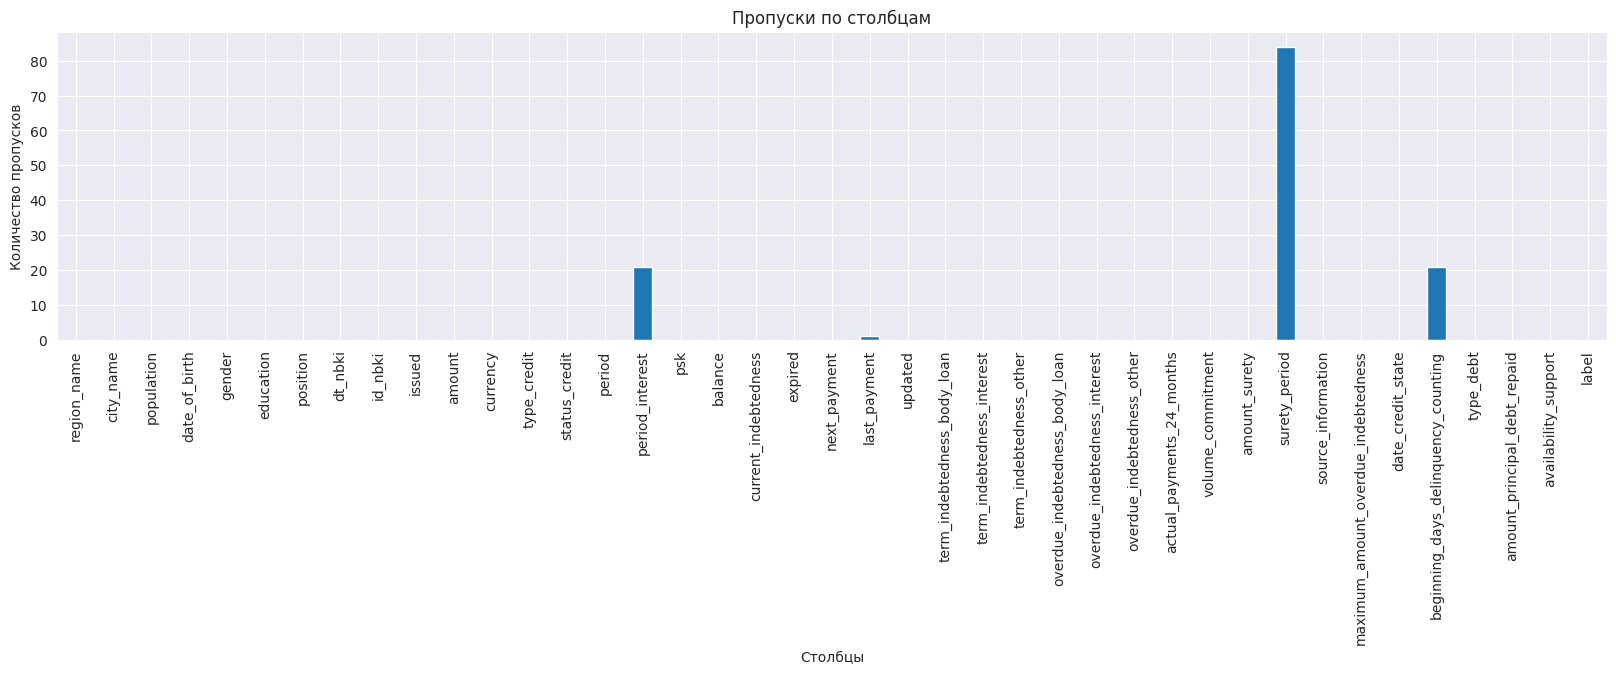

In [ ]:
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

In [ ]:
# Определяем столбцы с пропусками выше 51%
columns_to_drop = missing_percentages[missing_percentages > 51].index

# Удаляем выбранные столбцы из DataFrame
db = db.drop(columns=columns_to_drop)

In [ ]:
print(columns_to_drop)# удаленные столбцы с количеством пропусков более 51%

Index(['surety_period'], dtype='object')


In [ ]:
db.isna().sum().sum()# количество пустых значений уменьшилось.

6424547

In [ ]:
db["dt_nbki"].unique()

array(['2023-03-05T00:00:00.000000000', '2023-03-04T00:00:00.000000000',
       '2023-04-20T00:00:00.000000000', ...,
       '2023-05-22T00:00:00.000000000', '2021-10-03T00:00:00.000000000',
       '2022-03-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
db['dt_nbki'] = pd.to_datetime(db['dt_nbki'])
db = db[db['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [ ]:
#еще раз проверим по распределению пустых значений
#дропнем столбцы которые были удалены ранее и модель набрала 91%
db = db.drop(columns= {'period_interest', 'days_overdue', 'surety_period', 'beginning_days_delinquency_counting'})

#Перевод данных типа объект в категории

In [ ]:
obj_db = db.select_dtypes(include=['object']).copy()

In [ ]:
obj_db.dtypes

region_name             object
city_name               object
date of birth           object
gender                  object
education               object
position                object
id_nbki                 object
issued                  object
currency                object
type_credit             object
status_credit           object
period                  object
last_payment            object
updated                 object
source_information      object
date_credit_state       object
availability_support    object
dtype: object

In [ ]:
db = db.dropna (subset=['region_name'])
db['region_name'].isnull().mean()*100

0.0

In [ ]:
db["region_name"] = db["region_name"].astype('category')
db["region_name"] = db["region_name"].cat.codes

In [ ]:
db['city_name'].isnull().mean()*100

0.0

In [ ]:
db["city_name"] = db["city_name"].astype('category')
db["city_name"] = db["city_name"].cat.codes

In [ ]:
db['date_of_birth'].isnull().mean()*100

0.0

In [ ]:
db["date_of_birth"] = db["date_of_birth"].astype('category')
db["date_of_birth"] = db["date_of_birth"].cat.codes

In [ ]:
db['gender'].isnull().mean()*100

0.0

In [ ]:
db["gender"] = db["gender"].astype('category')
db["gender"] = db["gender"].cat.codes

In [ ]:
# Пустые значения
db['education'] = db['education'].fillna('Неполное')
db['education'].isnull().mean()*100

0.0

In [ ]:
db["education"] = db["education"].astype('category')
db["education"] = db["education"].cat.codes

In [ ]:
# Пустые значения
db['position'] = db['position'].fillna('прочее')
db['position'].isnull().mean()*100

0.0

In [ ]:
db["position"] = db["position"].astype('category')
db["position"] = db["position"].cat.codes

In [ ]:
db['dt_nbki'].isnull().mean()*100

0.0

In [ ]:
db["dt_nbki"] = db["dt_nbki"].astype('category')
db["dt_nbki"] = db["dt_nbki"].cat.codes

In [ ]:
db["dt_nbki"].unique()

array([788, 787, 834, 833, 534, 821, 818, 737, 822, 828, 660, 824, 805,
       739, 845, 825, 826, 793, 738, 840, 722, 480, 820, 829, 740, 847,
       846, 855, 794, 789, 774, 573, 765, 827, 732, 605, 838, 776, 622,
       744, 702, 779, 770, 786, 759, 615, 768, 856, 778, 782, 807, 751,
       831, 716, 851, 630, 667, 712, 785, 810, 843, 832, 524, 814, 858,
       795, 714, 550, 815, 837, 718, 746, 508, 707, 594, 835, 800, 525,
       743, 541, 767, 719, 736, 459, 581, 492, 823, 742, 775, 862, 708,
       781, 803, 623, 764, 791, 808, 483, 849, 755, 705, 670, 761, 692,
       817, 606, 839, 553, 701, 796, 612, 694, 685, 638, 763, 458, 720,
       784, 769, 801, 792, 799, 587, 819, 749, 842, 806, 646, 528, 542,
       798, 836, 771, 643, 729, 659, 699, 797, 844, 777, 652, 790, 625,
       813, 677, 715, 804, 700, 689, 734, 773, 830, 651, 853, 760, 674,
       859, 850, 559, 680, 678, 717, 848, 772, 560, 723, 730, 616, 802,
       642, 650, 748, 857, 812, 696, 698, 691, 735, 676, 668, 44

In [ ]:
db['id_nbki'].isnull().mean()*100

0.0

In [ ]:
db["id_nbki"] = db["id_nbki"].astype('category')
db["id_nbki"] = db["id_nbki"].cat.codes

In [ ]:
db = db.dropna (subset=['issued'])
db['issued'].isnull().mean()*100

0.0

In [ ]:
db["issued"] = db["issued"].astype('category')
db["issued"] = db["issued"].cat.codes

In [ ]:
# Пустые значения
db['type_credit'] = db['type_credit'].fillna('ДругойТипКредита')
db['type_credit'].isnull().mean()*100

0.0

In [ ]:
db["type_credit"] = db["type_credit"].astype('category')
db["type_credit"] = db["type_credit"].cat.codes

In [ ]:
db = db.dropna (subset=['status_credit'])
db['status_credit'].isnull().mean()*100

0.0

In [ ]:
db["status_credit"] = db["status_credit"].astype('category')
db["status_credit"] = db["status_credit"].cat.codes

In [ ]:
db['period'] = db['period'].fillna('2100-01-01')
db['period'].isnull().mean()*100

0.0

In [ ]:
db["period"] = db["period"].astype('category')
db["period"] = db["period"].cat.codes

In [ ]:
# Пустые значения
db['last_payment'] = db['last_payment'].fillna('2017-01-01')
db['last_payment'].isnull().mean()*100

0.0

In [ ]:
db["last_payment"] = db["last_payment"].astype('category')
db["last_payment"] = db["last_payment"].cat.codes

In [ ]:
db['updated'].isnull().mean()*100

0.0

In [ ]:
db["updated"] = db["updated"].astype('category')
db["updated"] = db["updated"].cat.codes

In [ ]:
db['source_information'].isnull().mean()*100

0.0

In [ ]:
db["source_information"] = db["source_information"].astype('category')
db["source_information"] = db["source_information"].cat.codes

In [ ]:
db = db.dropna (subset=['date_credit_state'])
db['date_credit_state'].isnull().mean()*100

0.0

In [ ]:
db["date_credit_state"] = db["date_credit_state"].astype('category')
db["date_credit_state"] = db["date_credit_state"].cat.codes

In [ ]:
db['availability_support'].isnull().mean()*100

0.0

In [ ]:
db["availability_support"] = db["availability_support"].astype('category')
db["availability_support"] = db["availability_support"].cat.codes

In [ ]:
db = db.drop(columns='currency')#удаление столбца валюта
db = db.drop(columns='period_interest')
db = db.drop(columns='volume_commitment ')
db = db.drop(columns='type_debt ')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12380339 entries, 0 to 14688925
Data columns (total 38 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   region_name                          int8          
 1   city_name                            int16         
 2   population                           int32         
 3   date_of_birth                        int16         
 4   gender                               int8          
 5   education                            int8          
 6   position                             int8          
 7   dt_nbki                              int16         
 8   id_nbki                              int16         
 9   issued                               int16         
 10  amount                               float64       
 11  type_credit                          int8          
 12  status_credit                        int8          
 13  period                   

In [ ]:
db.to_csv('/content/gdrive/MyDrive/scorring/Base/db_4-3_cat_cl2-1.csv', index=False)

In [ ]:
db.to_pickle('/content/gdrive/MyDrive/scorring/Base/data.pkl.zip', compression='zip')

#Балансировка классов

In [ ]:
db = pd.read_pickle('/content/gdrive/MyDrive/scorring/Base/data.pkl.zip')

In [ ]:
db.agg(['nunique']).transpose()

0    10206756
1      982016
3      743128
2      448439
Name: label, dtype: int64


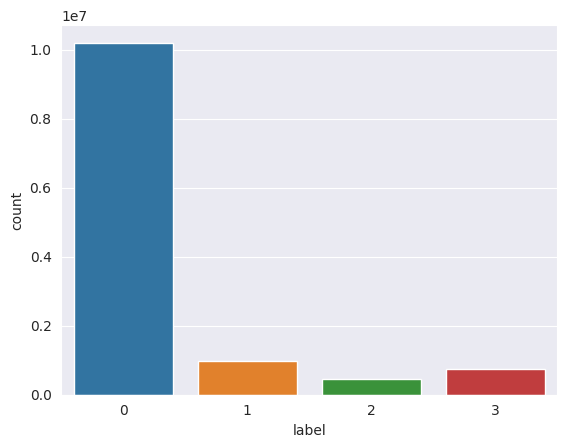

In [ ]:
print(db.label.value_counts())
sns.countplot(x=db.label);

In [ ]:
d1, d4, d2, d3 = db.label.value_counts()

In [ ]:
def show_data(d1=d1, d2=d2, d3=d3, d4=d4):
  values = [d1, d2, d3, d4]
  labels = ['1', '2', '3', '4']
  colors = ['blue', 'orange', 'green', 'red']  # Список цветов для столбцов

  plt.bar(labels, values, color=colors)
  plt.xlabel('Категория')
  plt.ylabel('Количество строк')
  plt.title('Кредиты')
  plt.show()


In [ ]:
df1 = db.loc[db.label == 0]
df1['id_nbki'].nunique()

4998

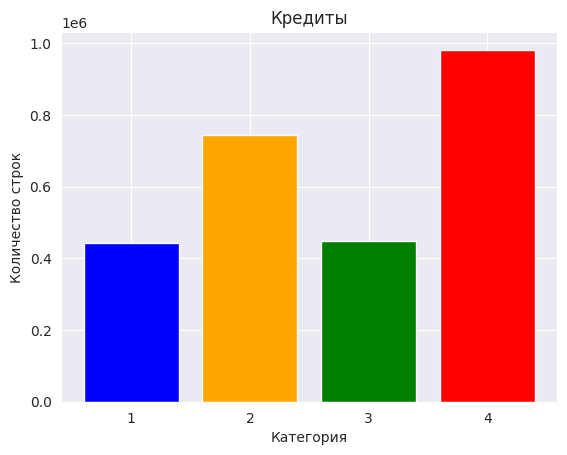

In [ ]:
df1 = df1[df1['id_nbki'].isin(df1['id_nbki'].unique()[-4830:])]
show_data(d1=df1.shape[0])

In [ ]:
df2 = db.loc[db.label == 1]
df2['id_nbki'].nunique()

9184

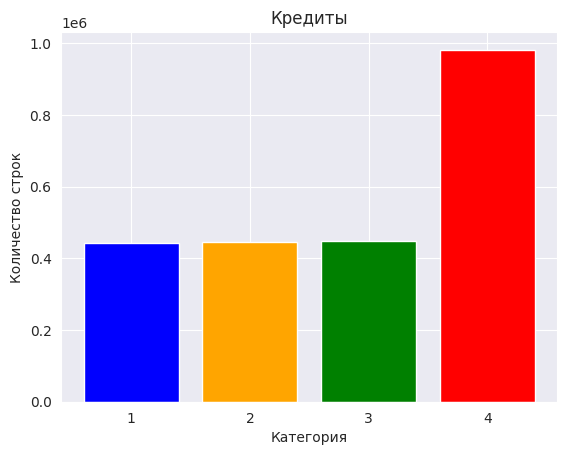

In [ ]:
df2 = df2[df2['id_nbki'].isin(df2['id_nbki'].unique()[-4650:])]
show_data(d1=df1.shape[0], d2=df2.shape[0])

In [ ]:
df3 = db.loc[db.label == 2]
df3['id_nbki'].nunique()

7622

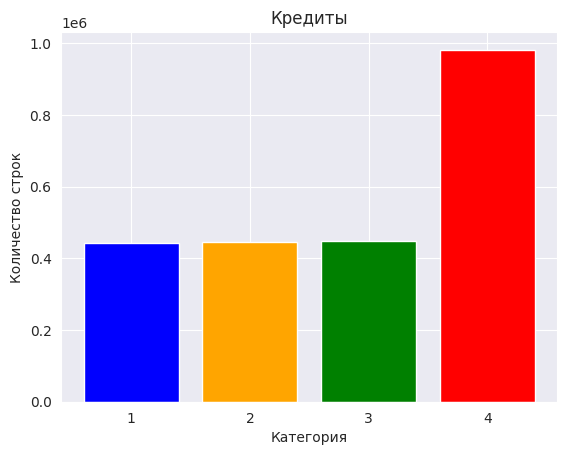

In [ ]:
show_data(d1=df1.shape[0], d2=df2.shape[0], d3=df3.shape[0])

In [ ]:
df4 = db.loc[db.label == 3]
df4['id_nbki'].nunique()

14879

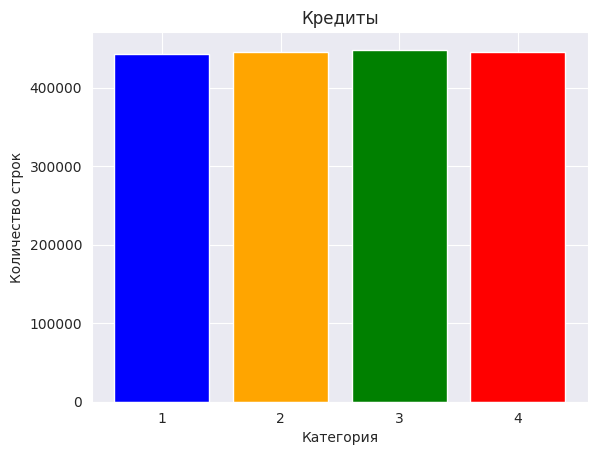

In [ ]:
df4 = df4[df4['id_nbki'].isin(df4['id_nbki'].unique()[-10000:])]
show_data(d1=df1.shape[0], d2=df2.shape[0], d3=df3.shape[0], d4=df4.shape[0])

In [ ]:
df1.shape, df2.shape, df3.shape, df4.shape

((442665, 38), (444918, 38), (448439, 38), (445889, 38))

In [ ]:
db_bal = pd.concat([df1, df2, df3, df4])

In [ ]:
db_bal.to_csv('/content/gdrive/MyDrive/scorring/Base/db_bal_new.csv', index=False)

In [ ]:
db_bal.to_pickle('/content/gdrive/MyDrive/scorring/Base/db_bal_new.pkl.zip', compression='zip')

#Оценка важности данных

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/scorring/Base/db_bal_new.csv')

In [ ]:
db = pd.read_pickle('/content/gdrive/MyDrive/scorring/Base/db_bal_new.pkl.zip')

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389510 entries, 5230 to 14688925
Data columns (total 35 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   region_name                          1389510 non-null  int8   
 1   city_name                            1389510 non-null  int16  
 2   population                           1389510 non-null  int32  
 3   date_of_birth                        1389510 non-null  int16  
 4   gender                               1389510 non-null  int8   
 5   education                            1389510 non-null  int8   
 6   position                             1389510 non-null  int8   
 7   dt_nbki                              1389510 non-null  int16  
 8   id_nbki                              1389510 non-null  int16  
 9   issued                               1389510 non-null  int16  
 10  amount                               1389510 non-null  float64

In [ ]:
db = db.dropna()

Feature: date_of_birth Score: 0.9395506876721207
Feature: id_nbki Score: 0.8569004267578908
Feature: dt_nbki Score: 0.32472564035027673
Feature: city_name Score: 0.3014923703026575
Feature: population Score: 0.2667998756040397
Feature: type_credit Score: 0.15031231913186716
Feature: balance Score: 0.14579546628488949
Feature: status_credit Score: 0.13772876114064747
Feature: source_information Score: 0.11163752321616549
Feature: date_credit_state Score: 0.1047778606216756
Feature: updated Score: 0.10416457428324222
Feature: last_payment Score: 0.10386672480319703
Feature: amount Score: 0.10029944223263598
Feature: issued Score: 0.09790491851271277
Feature: period Score: 0.0914767447344964
Feature: psk Score: 0.0909264215082537
Feature: region_name Score: 0.09004302271186582
Feature: amount_principal_debt_repaid Score: 0.08734478887014951
Feature: education Score: 0.0872430883695472
Feature: position Score: 0.07580982307206163
Feature: actual_payments_24_months Score: 0.0356161769255338

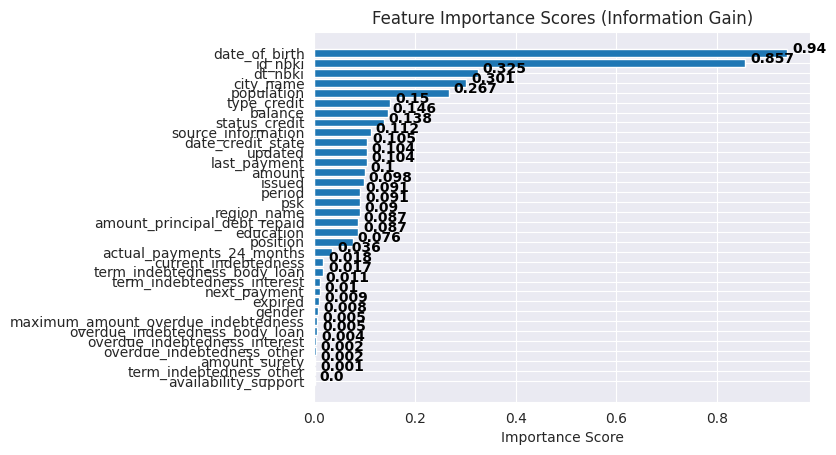

In [ ]:
# Split the dataset into features and target
X = db.drop('label', axis=1)
y = np.array(db['label'])

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns.values)):
    feature_scores[X.columns.values[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

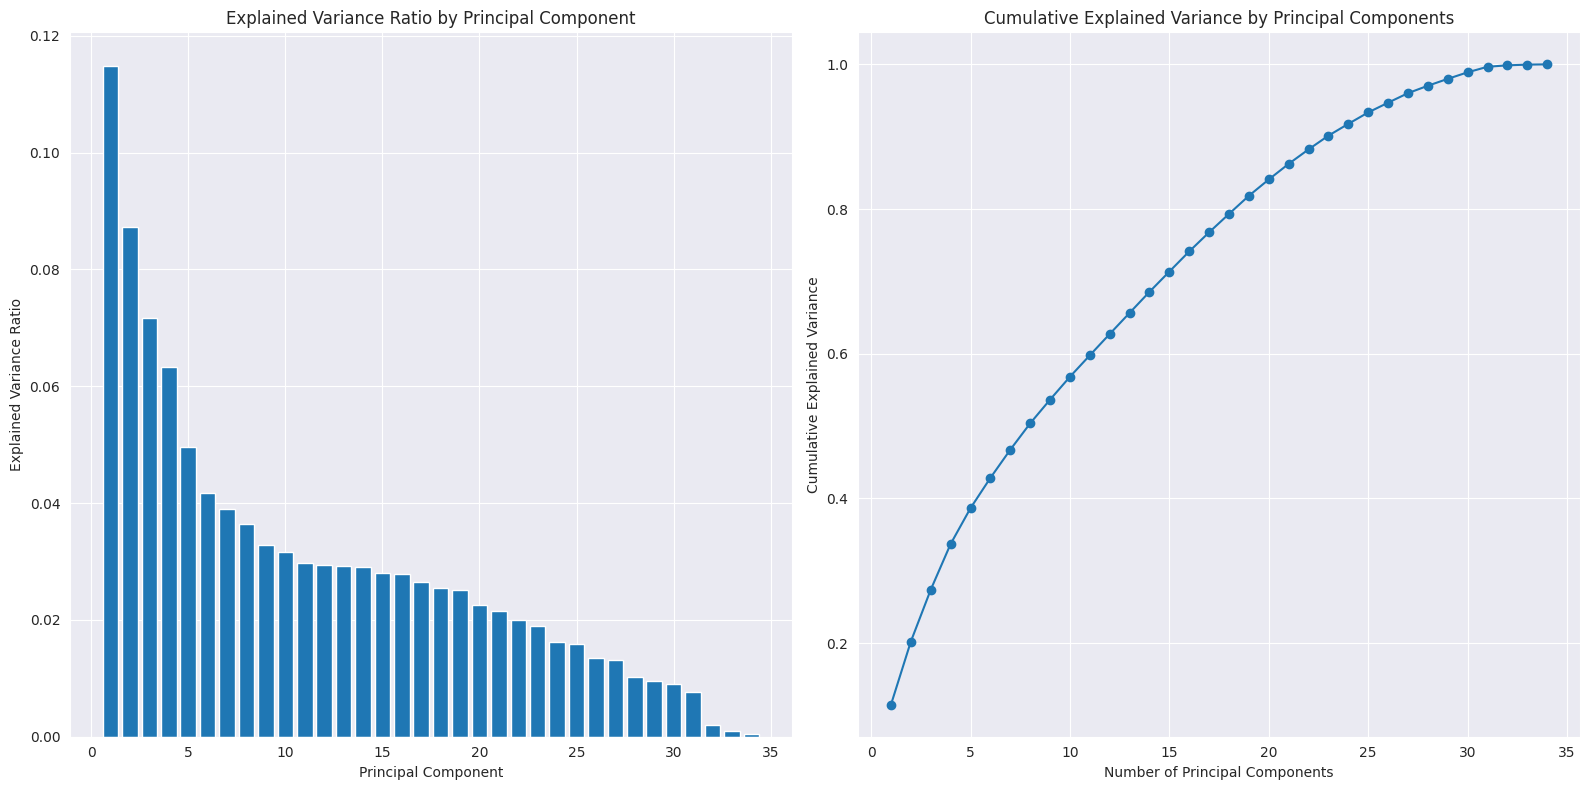

In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

## Корреляция

In [ ]:
db = db.reset_index(drop=True)

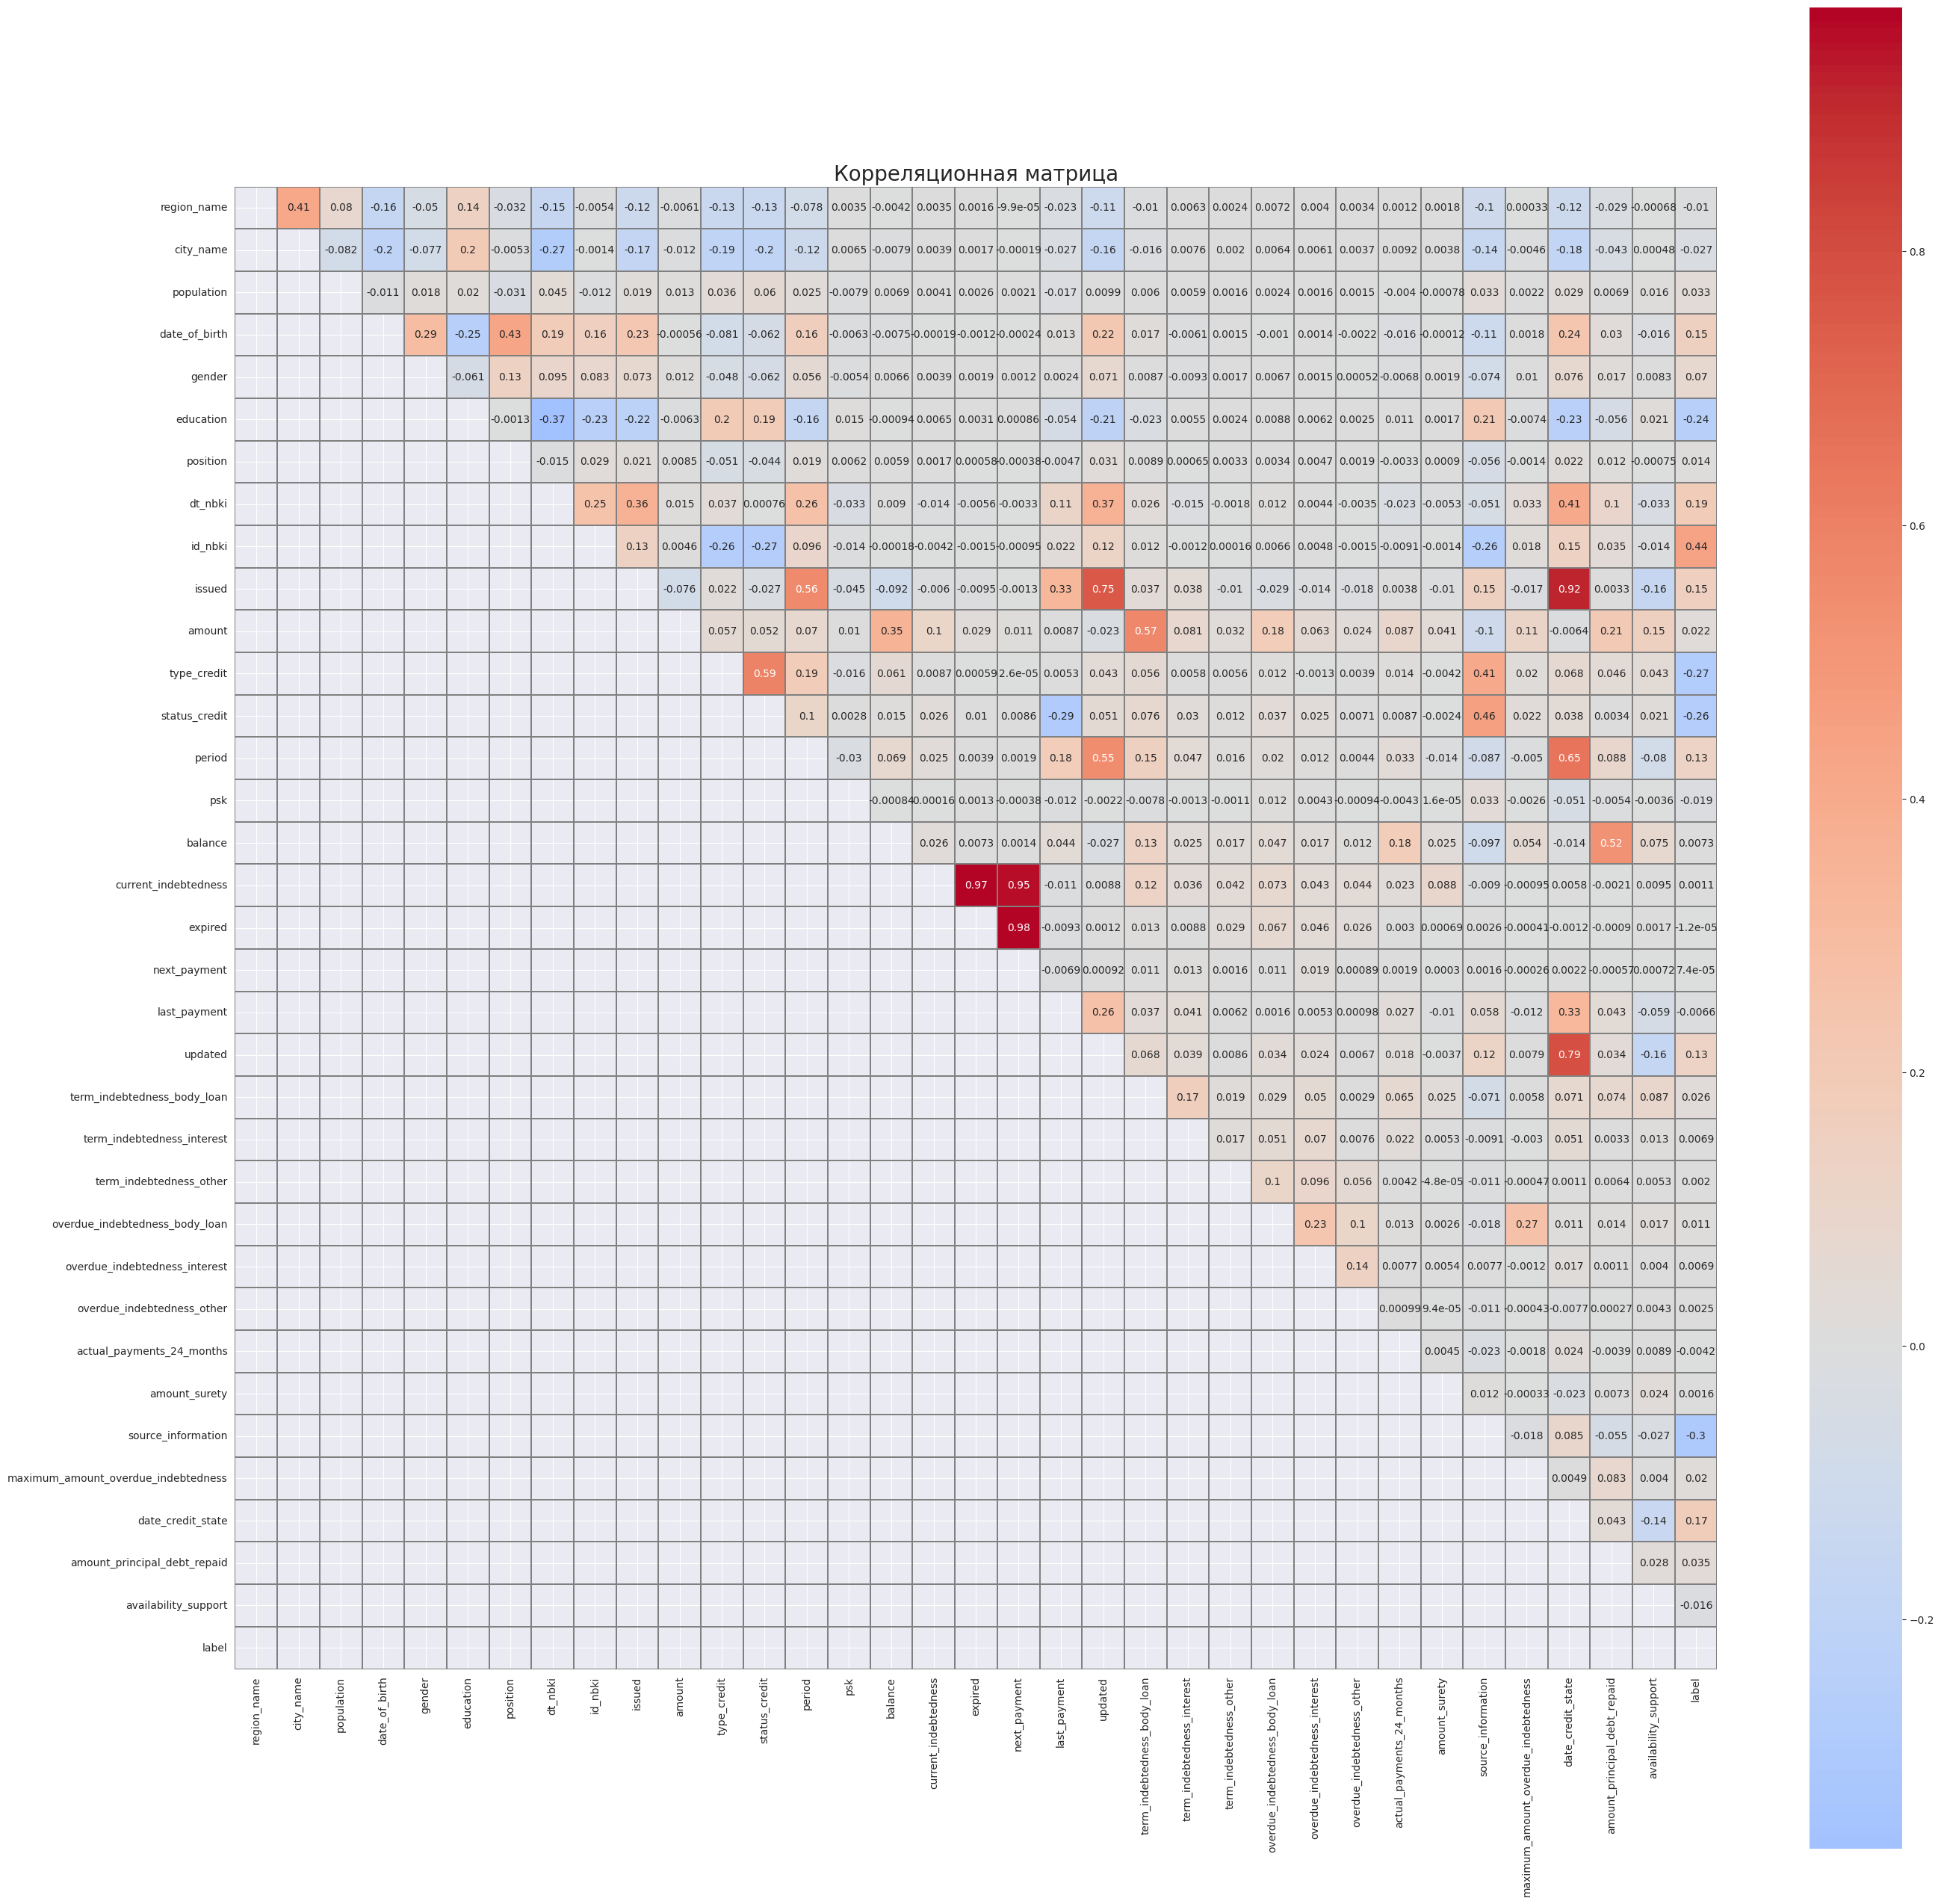

In [ ]:
# Таблица корреляции признаков
mask_1 = np.tril(db.corr())
plt.figure(figsize=(32,32))
sns.heatmap(db.corr(), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

In [ ]:
spearman_correlation = db.corr(method='spearman')
spearman_correlation

,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,...,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,label
region_name,1.000000,0.468126,-0.135209,-0.160672,-0.062602,0.169007,-0.033815,-0.136221,-0.015667,-0.158825,...,0.009544,0.013696,0.044190,0.018395,-0.072311,-0.011099,-0.156375,-0.168349,-0.004419,-0.021975
city_name,0.468126,1.000000,-0.321943,-0.238920,-0.079477,0.306161,-0.010886,-0.305317,-0.030730,-0.280219,...,0.017217,0.023894,0.087860,0.029113,-0.110110,-0.028332,-0.282342,-0.307456,0.001407,-0.071261
population,-0.135209,-0.321943,1.000000,0.138604,0.099236,-0.185949,-0.036572,0.236181,0.099468,0.225952,...,0.006058,0.001163,-0.048644,-0.024616,-0.029671,0.031955,0.237811,0.233305,0.005550,0.189298
date_of_birth,-0.160672,-0.238920,0.138604,1.000000,0.290379,-0.265944,0.493265,0.159879,0.147045,0.273967,...,0.023582,0.014373,-0.053448,-0.026967,-0.043358,0.024424,0.276762,0.211736,-0.015765,0.143872
gender,-0.062602,-0.079477,0.099236,0.290379,1.000000,-0.057566,0.168013,0.088821,0.081435,0.089014,...,0.004820,0.001216,-0.034685,-0.013764,-0.043517,0.021160,0.089891,0.085181,0.008282,0.063626
education,0.169007,0.306161,-0.185949,-0.265944,-0.057566,1.000000,0.044020,-0.373353,-0.203523,-0.305907,...,0.014948,0.021868,0.095555,0.015115,0.076079,-0.043642,-0.311083,-0.379496,0.024658,-0.217445
position,-0.033815,-0.010886,-0.036572,0.493265,0.168013,0.044020,1.000000,-0.048239,0.019846,0.013191,...,0.023333,0.019432,-0.036132,-0.018322,-0.007459,-0.001651,0.016746,0.045748,-0.000006,-0.012847
dt_nbki,-0.136221,-0.305317,0.236181,0.159879,0.088821,-0.373353,-0.048239,1.000000,0.227315,0.451240,...,0.012421,-0.011414,-0.139699,-0.019475,-0.009688,0.125670,0.484871,0.647127,-0.031810,0.178543
id_nbki,-0.015667,-0.030730,0.099468,0.147045,0.081435,-0.203523,0.019846,0.227315,1.000000,0.154762,...,0.011467,0.002398,-0.057543,-0.007221,-0.118051,0.059506,0.165715,0.236774,-0.011801,0.379876
issued,-0.158825,-0.280219,0.225952,0.273967,0.089014,-0.305907,0.013191,0.451240,0.154762,1.000000,...,0.034557,0.007904,0.121435,-0.028137,0.214953,0.011822,0.942479,0.359243,-0.098231,0.206731


In [ ]:
db['Client_class'].unique()

array([0, 1, 2, 3])

##Тест без id_nkbi

In [ ]:
db = db.drop(columns='id_nbki')

In [ ]:
db_val = db_val.drop(columns='id_nbki')

In [ ]:
db_test = db_test.drop(columns='id_nbki')

In [ ]:
db.isna().sum()

region_name                            0
city_name                              0
population                             0
date of birth                          0
gender                                 0
education                              0
position                               0
dt_nbki                                0
issued                                 0
amount                                 0
type_credit                            0
status_credit                          0
period                                 0
psk                                    0
balance                                0
current_indebtedness                   0
expired                                0
next_payment                           0
last_payment                           0
updated                                0
term_indebtedness_body_loan            0
term_indebtedness_interest             0
term_indebtedness_other                0
overdue_indebtedness_body_loan         0
overdue_indebted

##Тест анкетные данные

In [ ]:
db = db.drop(columns={'dt_nbki', 'issued', 'amount', 'type_credit', 'status_credit', 'period', 'psk', 'balance', 'current_indebtedness',
                      'expired', 'next_payment', 'last_payment', 'updated', 'term_indebtedness_body_loan','term_indebtedness_interest', 'term_indebtedness_other', 'overdue_indebtedness_body_loan',
                      'overdue_indebtedness_interest', 'overdue_indebtedness_other', 'actual_payments_24_Months', 'amount_surety', 'source_information',
                      'maximum_amount_overdue_indebtedness', 'date_credit_state', 'amount_principal_debt_repaid', 'availability_support'})

In [ ]:
db_val = db_val.drop(columns={'dt_nbki', 'issued', 'amount', 'type_credit', 'status_credit', 'period', 'psk', 'balance', 'current_indebtedness',
                      'expired', 'next_payment', 'last_payment', 'updated', 'term_indebtedness_body_loan','term_indebtedness_interest', 'term_indebtedness_other', 'overdue_indebtedness_body_loan',
                      'overdue_indebtedness_interest', 'overdue_indebtedness_other', 'actual_payments_24_Months', 'amount_surety', 'source_information',
                      'maximum_amount_overdue_indebtedness', 'date_credit_state', 'amount_principal_debt_repaid', 'availability_support'})

In [ ]:
db_test = db_test.drop(columns={'dt_nbki', 'issued', 'amount', 'type_credit', 'status_credit', 'period', 'psk', 'balance', 'current_indebtedness',
                      'expired', 'next_payment', 'last_payment', 'updated', 'term_indebtedness_body_loan','term_indebtedness_interest', 'term_indebtedness_other', 'overdue_indebtedness_body_loan',
                      'overdue_indebtedness_interest', 'overdue_indebtedness_other', 'actual_payments_24_Months', 'amount_surety', 'source_information',
                      'maximum_amount_overdue_indebtedness', 'date_credit_state', 'amount_principal_debt_repaid', 'availability_support'})

##Деление базы на trein/val/test по id_nkbi

In [ ]:
db = pd.read_pickle('/content/gdrive/MyDrive/scorring/Base/db_bal_new.pkl.zip')

In [ ]:
#test
def split(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_test = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_test


db_train, db_test = split(db, 'db')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| db        | 14894               | 2978              | (1114740, 35) | (274770, 35) |
+-----------+---------------------+-------------------+---------------+--------------+



In [ ]:
#val
def split1(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_val = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_val


db_train, db_val = split1(db_train, 'db')

+-----------+---------------------+-------------------+--------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train        | Val          |
+-----------+---------------------+-------------------+--------------+--------------+
| db        | 11916               | 2383              | (856720, 35) | (258020, 35) |
+-----------+---------------------+-------------------+--------------+--------------+



In [ ]:
db_train.to_csv('/content/gdrive/MyDrive/scorring/Base/db_train_db_bal_new.csv', index=False)

In [ ]:
db_val.to_csv('/content/gdrive/MyDrive/scorring/Base/db_val_db_bal_new.csv', index=False)

In [ ]:
db_test.to_csv('/content/gdrive/MyDrive/scorring/Base/db_test_db_bal_new.csv', index=False)

#Перезагрузка и перевод в numpy_array

Разбиваем данные на X и Y

In [ ]:
db_train = pd.read_csv('/content/gdrive/MyDrive/scorring/Base/db_train_db_bal_new.csv')

In [ ]:
db_val = pd.read_csv('/content/gdrive/MyDrive/scorring/Base/db_val_db_bal_new.csv')

In [ ]:
db_test = pd.read_csv('/content/gdrive/MyDrive/scorring/Base/db_test_db_bal_new.csv')

In [ ]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856720 entries, 0 to 856719
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          856720 non-null  int64  
 1   city_name                            856720 non-null  int64  
 2   population                           856720 non-null  int64  
 3   date_of_birth                        856720 non-null  int64  
 4   gender                               856720 non-null  int64  
 5   education                            856720 non-null  int64  
 6   position                             856720 non-null  int64  
 7   dt_nbki                              856720 non-null  int64  
 8   id_nbki                              856720 non-null  int64  
 9   issued                               856720 non-null  int64  
 10  amount                               856720 non-null  float64
 11  type_credit  

In [ ]:
db_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258020 entries, 0 to 258019
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          258020 non-null  int64  
 1   city_name                            258020 non-null  int64  
 2   population                           258020 non-null  int64  
 3   date_of_birth                        258020 non-null  int64  
 4   gender                               258020 non-null  int64  
 5   education                            258020 non-null  int64  
 6   position                             258020 non-null  int64  
 7   dt_nbki                              258020 non-null  int64  
 8   id_nbki                              258020 non-null  int64  
 9   issued                               258020 non-null  int64  
 10  amount                               258020 non-null  float64
 11  type_credit  

In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274770 entries, 0 to 274769
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          274770 non-null  int64  
 1   city_name                            274770 non-null  int64  
 2   population                           274770 non-null  int64  
 3   date_of_birth                        274770 non-null  int64  
 4   gender                               274770 non-null  int64  
 5   education                            274770 non-null  int64  
 6   position                             274770 non-null  int64  
 7   dt_nbki                              274770 non-null  int64  
 8   id_nbki                              274770 non-null  int64  
 9   issued                               274770 non-null  int64  
 10  amount                               274770 non-null  float64
 11  type_credit  

In [ ]:
X = db_train.drop('label', axis=1)
y = np.array(db_train['label'])

In [ ]:
X_val = db_val.drop('label', axis=1)
y_val = np.array(db_val['label'])

In [ ]:
X_test = db_test.drop('label', axis=1)
y_test = np.array(db_test['label'])

In [ ]:
#y = np.subtract(y, 1)#если классы идут с 1

In [ ]:
X, y

(        region_name  city_name  population  date_of_birth  gender  education  \
 0                 9         10      182291          16587       0          0   
 1                 9         10      182291          16587       0          0   
 2                 9         10      182291          16587       0          0   
 3                 9         10      182291          16587       0          0   
 4                 9         10      182291          16587       0          0   
 ...             ...        ...         ...            ...     ...        ...   
 856715            9          9      182291          16131       1          0   
 856716            9          9      182291          16131       1          0   
 856717            9          9      182291          16131       1          0   
 856718            9          9      182291          16131       1          0   
 856719            9          9      182291          16131       1          0   
 
         position  dt_nbki

In [ ]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(X)
x = scaler.transform(X)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[ 0.51695918  0.04303638  0.57132996 ...  6.70980228  0.
  13.78108201]
 [ 0.51695918  0.04303638  0.57132996 ...  6.70980228  0.
  13.78108201]
 [ 0.51695918  0.04303638  0.57132996 ...  6.71200981  0.
  13.78108201]
 ...
 [ 0.51695918  0.03873274  0.57132996 ...  6.18109767  0.
  13.78108201]
 [ 0.51695918  0.03873274  0.57132996 ...  5.10382065  0.
  13.78108201]
 [ 0.51695918  0.03873274  0.57132996 ...  5.05415112  0.
  13.78108201]]
[0 1 2 3]


In [ ]:
scaler.fit(X_val)
x_val = scaler.transform(X_val)
print(x_val) # Посмотрим на нормализованные данные
print(np.unique(y_val))

[[ 0.11812833  1.1735584   0.73515289 ...  5.7882796   0.
  11.78297521]
 [ 0.11812833  1.1735584   0.73515289 ...  6.38295858  0.
  11.78297521]
 [ 0.11812833  1.1735584   0.73515289 ...  6.38295858  0.
  11.78297521]
 ...
 [ 2.18537417  0.88879791  0.14465898 ...  5.52019534  0.
  11.78297521]
 [ 2.18537417  0.88879791  0.14465898 ...  5.63189712  0.
  11.78297521]
 [ 2.18537417  0.88879791  0.14465898 ...  5.22338777  0.05760079
  11.78297521]]
[0 1 2 3]


In [ ]:
scaler.fit(X_test)
x_test = scaler.transform(X_test)
print(x_test) # Посмотрим на нормализованные данные
print(np.unique(y_test))

[[ 1.58356584  0.22661814  0.40789783 ...  6.64915752  0.
  12.65705302]
 [ 1.58356584  0.22661814  0.40789783 ...  6.66581373  0.
  12.65705302]
 [ 1.58356584  0.22661814  0.40789783 ...  6.76575096  0.
  12.65705302]
 ...
 [ 2.37534876  0.87226606  0.06271067 ...  3.20354366  0.
  25.31410603]
 [ 2.37534876  0.87226606  0.06271067 ...  4.02080818  0.
  25.31410603]
 [ 2.37534876  0.87226606  0.06271067 ...  3.97750204  0.
  25.31410603]]
[0 1 2 3]


In [ ]:
from keras.utils import to_categorical

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y = to_categorical(y, num_classes = 4)

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_val = to_categorical(y_val, num_classes = 4)

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_test = to_categorical(y_test, num_classes = 4)

In [ ]:
print('Размер y:',y.shape)

Размер y: (856720, 4)


# AK

In [ ]:
search = ak.StructuredDataClassifier(max_trials=3)

In [ ]:
search.fit(x = x, y=y, verbose=1, epochs=50)

KeyboardInterrupt: ignored

In [ ]:
loss, acc = search.evaluate(x_test, y_test, verbose=0) #classification

y_predictions = search.predict(x_test)# оценка производительности модели

4286/4286 [==============================] - 11s 3ms/step


In [ ]:
acc

0.15878663957118988

In [ ]:
y_predictions

array([[2.5696656e-01, 1.1921113e-04, 7.0718391e-04, 7.4220705e-01],
       [1.0107590e-01, 1.0330700e-02, 8.2221162e-01, 6.6381849e-02],
       [2.7168539e-01, 8.0146037e-07, 9.7447950e-03, 7.1856910e-01],
       ...,
       [3.0607908e-04, 3.0887371e-03, 6.5081984e-01, 3.4578529e-01],
       [2.4626951e-04, 2.6548782e-03, 5.9241563e-01, 4.0468317e-01],
       [2.1197660e-04, 2.2519541e-03, 5.4627585e-01, 4.5126015e-01]],
      dtype=float32)

In [ ]:
model = search.export_model()# сохранение модели

In [ ]:
model.summary()# вывод лучшей архитектуры

NameError: ignored

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model_AK_cat_cl.keras')

In [ ]:
loss, acc = search.evaluate(xt, yt) #classification на тестовой базе

y_predictions = search.predict(xt)# оценка производительности модели

795/795 [==============================] - 2s 3ms/step


#Функии для моделей

In [ ]:
import time
def FitModel(model, epochs, batch_size):
  start_time = time.time() # счетчик времени
  history = model.fit(x,                            # Обучающая выборка
                          y,                               # Метки классов обучающей выборки
                          epochs=epochs,                             # Количество эпох
                          batch_size=batch_size,                         # Размер подвыборки для одного шага по данным на эпохе
                          validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

  end_time = time.time() # счетчик времени
  print("Время обучения: ", end_time - start_time) # вывод времени обучения
  total_time = end_time - start_time # calculate the total time

  print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
  print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

  plt.plot(history.history['accuracy'],
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'],
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

  plt.plot(history.history['loss'],
          label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'],
          label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
def Prediction(model):
  y_pred=model.predict(x_test)
  y_pred=np.argmax(y_pred, axis=1)
  y_test1=np.argmax(y_test, axis=1)
  cm = confusion_matrix(y_test1, y_pred)
  print(cm)

  #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g')
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()


  # Finding precision and recall
  accuracy = accuracy_score(y_test1, y_pred)
  print("Accuracy   :", accuracy)

##Модель 1

In [ ]:
number_of_cols = x.shape[1]

model12_cl = Sequential() # Последовательная модель нейронной сети

model12_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model12_cl.add(BatchNormalization())
model12_cl.add(Dense(32, activation='selu'))
#model12_cl.add(Dense(32, activation='relu'))
model12_cl.add(Dense(4, activation='softmax'))

model12_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,452
Trainable params: 4,452
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x.shape, y.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((856720, 34),
 (856720, 4),
 (258020, 34),
 (258020, 4),
 (274770, 34),
 (274770, 4))

Epoch 1/20
3347/3347 [==============================] - 46s 11ms/step - loss: 0.8383 - accuracy: 0.6224 - val_loss: 0.9775 - val_accuracy: 0.5441
Epoch 2/20
3347/3347 [==============================] - 21s 6ms/step - loss: 0.6991 - accuracy: 0.6749 - val_loss: 0.7918 - val_accuracy: 0.6308
Epoch 3/20
3347/3347 [==============================] - 20s 6ms/step - loss: 0.6698 - accuracy: 0.6867 - val_loss: 0.7646 - val_accuracy: 0.6443
Epoch 4/20
3347/3347 [==============================] - 19s 6ms/step - loss: 0.6458 - accuracy: 0.6969 - val_loss: 0.7596 - val_accuracy: 0.6513
Epoch 5/20
3347/3347 [==============================] - 18s 5ms/step - loss: 0.6288 - accuracy: 0.7067 - val_loss: 0.7595 - val_accuracy: 0.6574
Epoch 6/20
3347/3347 [==============================] - 18s 5ms/step - loss: 0.6151 - accuracy: 0.7149 - val_loss: 0.8020 - val_accuracy: 0.6424
Epoch 7/20
3347/3347 [==============================] - 19s 6ms/step - loss: 0.6034 - accuracy: 0.7211 - val_loss: 0.8207 - val_a

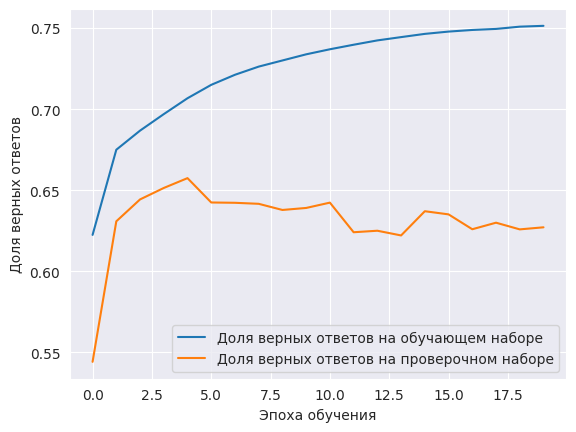

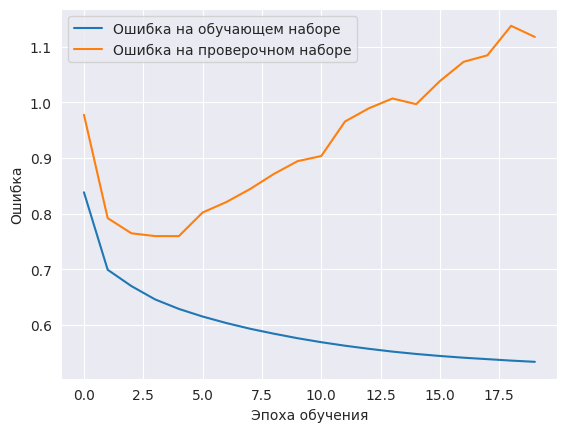

In [ ]:
FitModel(model12_cl, 20, 256)

In [ ]:
model12_cl.save('/content/gdrive/MyDrive/scorring/Base/model_db_bal_new.keras')

In [ ]:
loss, acc = model12_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc

0.6676493287086487

8587/8587 [==============================] - 70s 8ms/step
[[ 3660     2   714    31]
 [    4 58101 17809 16807]
 [  376 22677 59210  4001]
 [    4 22977  5918 62479]]


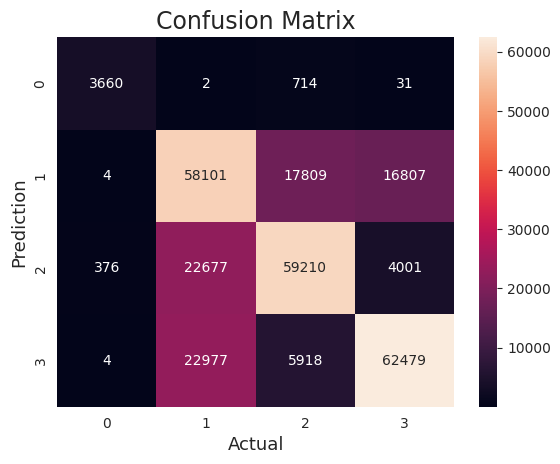

Accuracy   : 0.6676493066928704


In [ ]:
Prediction(model12_cl)

In [ ]:
#проверка работы сохраненной модели
model = load_model('/content/gdrive/MyDrive/scorring/Base/model_db_bal_new.keras')

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc

0.8266472220420837

In [ ]:
model.summary()# вывод лучшей архитектуры

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,452
Trainable params: 4,452
Non-trainable params: 0
_________________________________________________________________


##Модель 2

In [ ]:
number_of_cols = x.shape[1]

model22_cl = Sequential() # Последовательная модель нейронной сети

model22_cl.add(Dense(512, input_dim=number_of_cols, activation='selu'))

model22_cl.add(Dense(256, activation='selu'))

#model22_cl.add(Dense(128, activation='selu'))

model22_cl.add(Dense(4, activation='softmax'))

model22_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               17920     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 150,276
Trainable params: 150,276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model22_cl.compile(optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x.shape, y.shape

((856720, 34), (856720, 4))

Epoch 1/20
3347/3347 [==============================] - 69s 20ms/step - loss: 1.0667 - accuracy: 0.5003 - val_loss: 1.3719 - val_accuracy: 0.4643
Epoch 2/20
3347/3347 [==============================] - 66s 20ms/step - loss: 0.8702 - accuracy: 0.6257 - val_loss: 1.2147 - val_accuracy: 0.4992
Epoch 3/20
3347/3347 [==============================] - 51s 15ms/step - loss: 0.8036 - accuracy: 0.6486 - val_loss: 1.1552 - val_accuracy: 0.5059
Epoch 4/20
3347/3347 [==============================] - 49s 15ms/step - loss: 0.7729 - accuracy: 0.6566 - val_loss: 1.1329 - val_accuracy: 0.5139
Epoch 5/20
3347/3347 [==============================] - 47s 14ms/step - loss: 0.7565 - accuracy: 0.6587 - val_loss: 1.1115 - val_accuracy: 0.5164
Epoch 6/20
3347/3347 [==============================] - 51s 15ms/step - loss: 0.7465 - accuracy: 0.6596 - val_loss: 1.1082 - val_accuracy: 0.5152
Epoch 7/20
3347/3347 [==============================] - 50s 15ms/step - loss: 0.7399 - accuracy: 0.6608 - val_loss: 1.0937 -

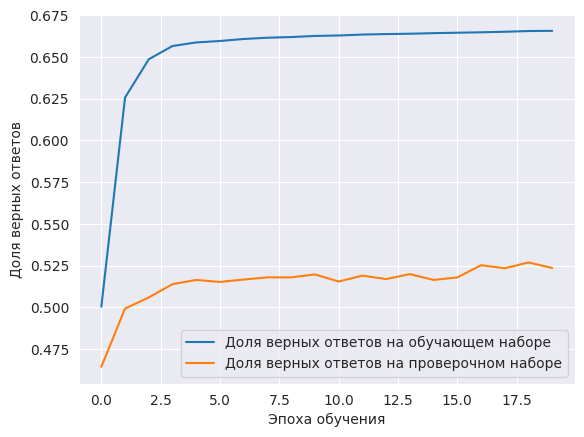

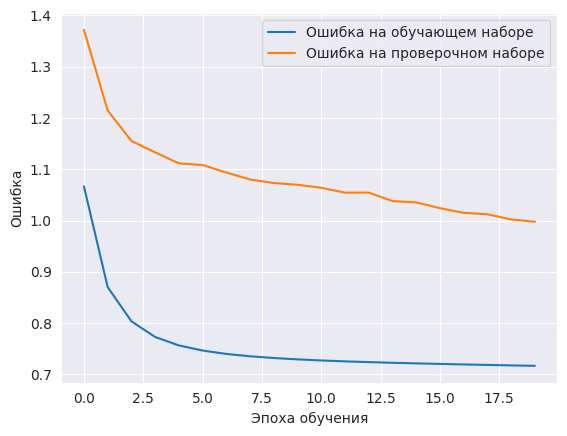

In [ ]:
FitModel(model22_cl, 20, 256)

In [ ]:
model22_cl.save('/content/gdrive/MyDrive/scorring/Base/mode2_db_bal_new.keras')

In [ ]:
y_test.shape

(274770,)

In [ ]:
loss, acc = model22_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc

0.6234959959983826

8587/8587 [==============================] - 41s 5ms/step
[[ 1982    27  2397     1]
 [  106 42807 15377 34431]
 [  139 23530 56201  6394]
 [   64 15779  5207 70328]]


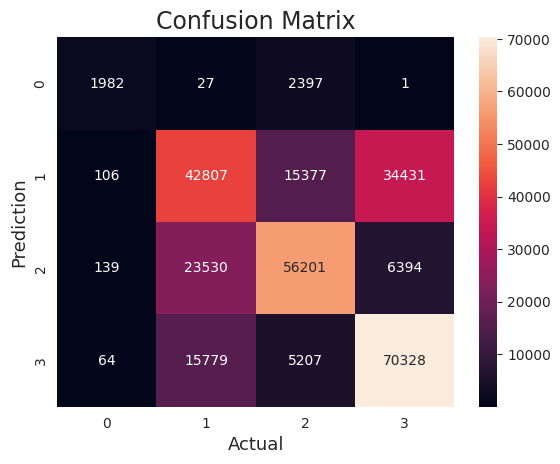

Accuracy   : 0.6234960148487826


In [ ]:
Prediction(model22_cl)

## Модель 3

In [ ]:
number_of_cols = x.shape[1]

model3 = Sequential() # Последовательная модель нейронной сети

model3.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model3.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(4, activation='softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 151,300
Trainable params: 150,788
Non-trainable params: 512
________________________________________________

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
3347/3347 [==============================] - 75s 22ms/step - loss: 0.6205 - accuracy: 0.7134 - val_loss: 1.5166 - val_accuracy: 0.6267
Epoch 2/20
3347/3347 [==============================] - 73s 22ms/step - loss: 0.5519 - accuracy: 0.7416 - val_loss: 3.3474 - val_accuracy: 0.5478
Epoch 3/20
3347/3347 [==============================] - 51s 15ms/step - loss: 0.5245 - accuracy: 0.7558 - val_loss: 3.6237 - val_accuracy: 0.5614
Epoch 4/20
3347/3347 [==============================] - 51s 15ms/step - loss: 0.5040 - accuracy: 0.7674 - val_loss: 2.7589 - val_accuracy: 0.6029
Epoch 5/20
3347/3347 [==============================] - 57s 17ms/step - loss: 0.4864 - accuracy: 0.7779 - val_loss: 3.2365 - val_accuracy: 0.5525
Epoch 6/20
3347/3347 [==============================] - 58s 17ms/step - loss: 0.4679 - accuracy: 0.7887 - val_loss: 2.1951 - val_accuracy: 0.6123
Epoch 7/20
3347/3347 [==============================] - 53s 16ms/step - loss: 0.4502 - accuracy: 0.7982 - val_loss: 3.1394 -

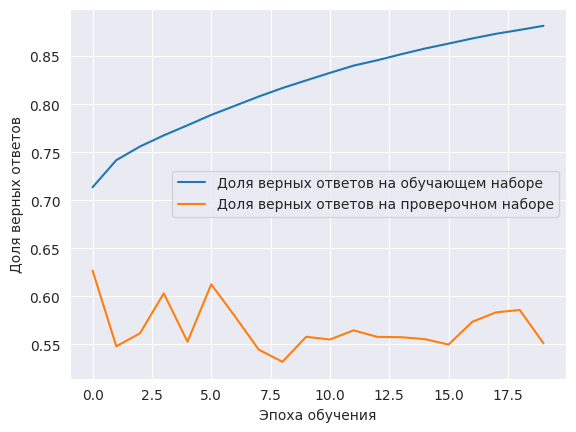

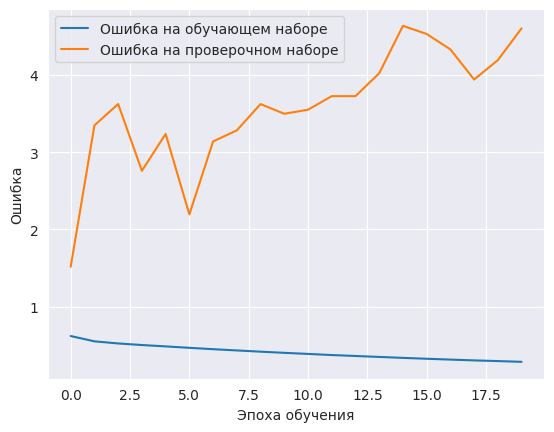

In [ ]:
FitModel(model3, 20, 256)

In [ ]:
model3.save('/content/gdrive/MyDrive/scorring/Base/mode3_db_bal_new.keras')

In [ ]:
loss, acc = model3.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 43s 5ms/step - loss: 1.4400 - accuracy: 0.6529


In [ ]:
acc

0.6528550982475281

8587/8587 [==============================] - 21s 2ms/step
[[ 3216    64  1114    13]
 [    5 44742 21572 26402]
 [  115 11922 64047 10180]
 [    0 15772  8226 67380]]


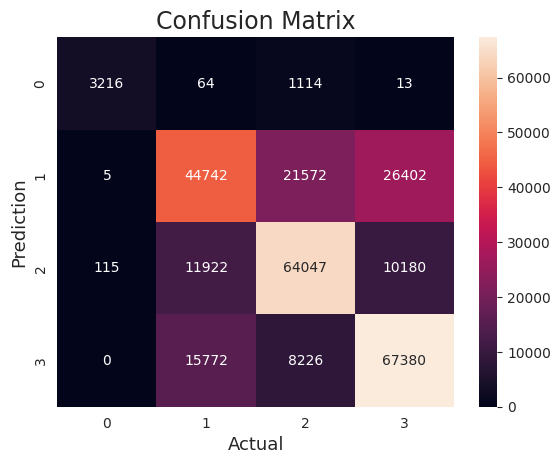

Accuracy   : 0.6528551151872475


In [ ]:
Prediction(model3)

##Модель 3.1

In [ ]:
model31 = model3

Epoch 1/30
1674/1674 [==============================] - 58s 35ms/step - loss: 0.2512 - accuracy: 0.8979 - val_loss: 5.1738 - val_accuracy: 0.5782
Epoch 2/30
1674/1674 [==============================] - 50s 30ms/step - loss: 0.2475 - accuracy: 0.8991 - val_loss: 5.3608 - val_accuracy: 0.5921
Epoch 3/30
1674/1674 [==============================] - 57s 34ms/step - loss: 0.2414 - accuracy: 0.9022 - val_loss: 5.0426 - val_accuracy: 0.5874
Epoch 4/30
1674/1674 [==============================] - 47s 28ms/step - loss: 0.2346 - accuracy: 0.9049 - val_loss: 6.0071 - val_accuracy: 0.5586
Epoch 5/30
1674/1674 [==============================] - 46s 27ms/step - loss: 0.2280 - accuracy: 0.9076 - val_loss: 5.4031 - val_accuracy: 0.5766
Epoch 6/30
1674/1674 [==============================] - 44s 26ms/step - loss: 0.2231 - accuracy: 0.9099 - val_loss: 5.9388 - val_accuracy: 0.5755
Epoch 7/30
1674/1674 [==============================] - 46s 28ms/step - loss: 0.2177 - accuracy: 0.9121 - val_loss: 6.6832 -

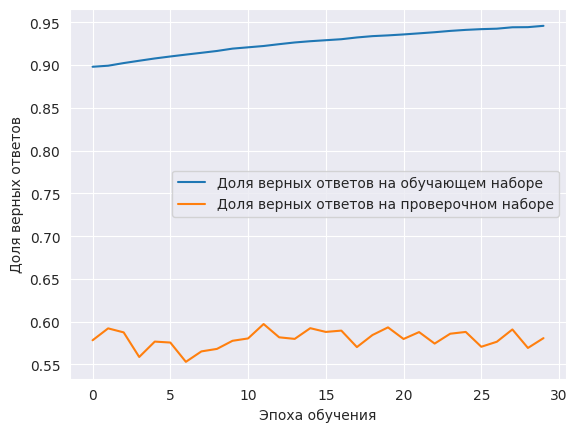

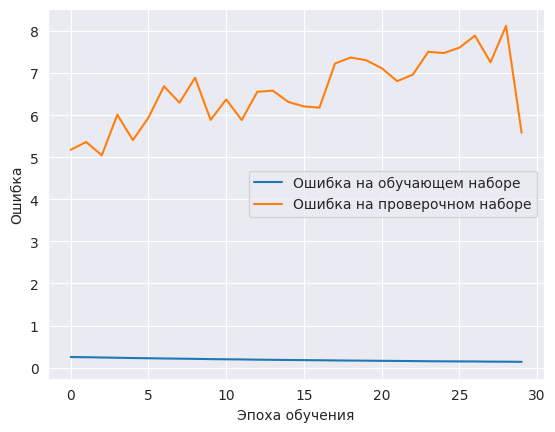

In [ ]:
FitModel(model31, 30, 512)

In [ ]:
model31.save('/content/gdrive/MyDrive/scorring/Base/model31_db_bal_new.keras')

In [ ]:
loss, acc = model31.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 43s 5ms/step - loss: 2.5562 - accuracy: 0.6525


In [ ]:
acc

0.6524947881698608

8587/8587 [==============================] - 23s 3ms/step
[[ 3185   117  1096     9]
 [    0 50176 18938 23607]
 [  107 14966 60530 10661]
 [    1 19485  6497 65395]]


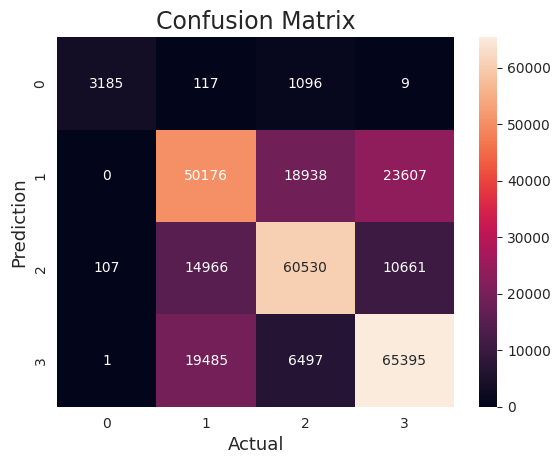

Accuracy   : 0.6524948138443062


In [ ]:
Prediction(model31)

##Модель 3.2

In [ ]:
model32 = model31

Epoch 1/30
1116/1116 [==============================] - 76s 68ms/step - loss: 0.1221 - accuracy: 0.9527 - val_loss: 6.3568 - val_accuracy: 0.5883
Epoch 2/30
1116/1116 [==============================] - 59s 53ms/step - loss: 0.1220 - accuracy: 0.9526 - val_loss: 7.2388 - val_accuracy: 0.5937
Epoch 3/30
1116/1116 [==============================] - 42s 38ms/step - loss: 0.1211 - accuracy: 0.9529 - val_loss: 8.7083 - val_accuracy: 0.5835
Epoch 4/30
1116/1116 [==============================] - 42s 37ms/step - loss: 0.1204 - accuracy: 0.9530 - val_loss: 6.2619 - val_accuracy: 0.6030
Epoch 5/30
1116/1116 [==============================] - 42s 38ms/step - loss: 0.1187 - accuracy: 0.9537 - val_loss: 8.7608 - val_accuracy: 0.5780
Epoch 6/30
1116/1116 [==============================] - 42s 37ms/step - loss: 0.1168 - accuracy: 0.9543 - val_loss: 8.2885 - val_accuracy: 0.5843
Epoch 7/30
1116/1116 [==============================] - 43s 38ms/step - loss: 0.1157 - accuracy: 0.9546 - val_loss: 9.1856 -

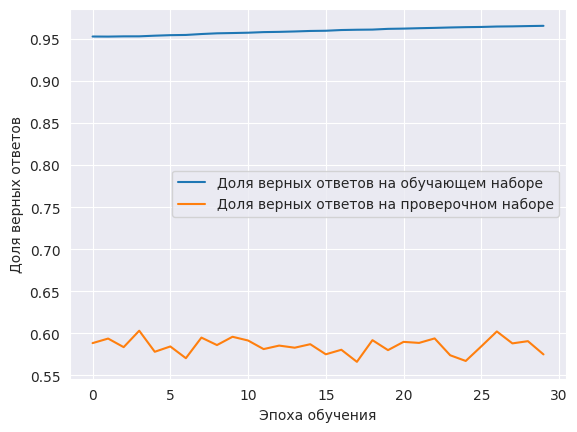

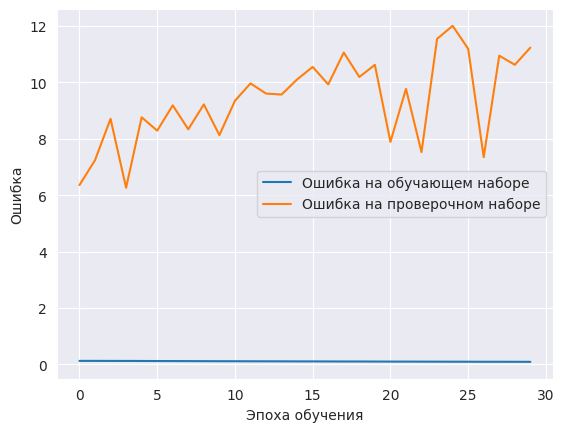

In [ ]:
FitModel(model32, 30, 768)

In [ ]:
model32.save('/content/gdrive/MyDrive/scorring/Base/model32_db_bal_new.keras')

NameError: ignored

In [ ]:
loss, acc = model32.evaluate(x_test, y_test, verbose=1) #classification

NameError: ignored

In [ ]:
acc

In [ ]:
Prediction(model32)

##Модель 4

In [ ]:
number_of_cols = x.shape[1]

model4 = Sequential() # Последовательная модель нейронной сети

model4.add(Dense(128, input_dim=number_of_cols, activation='selu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='selu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(4, activation='softmax'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4480      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
837/837 [==============================] - 17s 18ms/step - loss: 0.7489 - accuracy: 0.6624 - val_loss: 0.9817 - val_accuracy: 0.5824
Epoch 2/20
837/837 [==============================] - 16s 19ms/step - loss: 0.6428 - accuracy: 0.6984 - val_loss: 1.1127 - val_accuracy: 0.5678
Epoch 3/20
837/837 [==============================] - 15s 18ms/step - loss: 0.6043 - accuracy: 0.7147 - val_loss: 1.2616 - val_accuracy: 0.5770
Epoch 4/20
837/837 [==============================] - 15s 18ms/step - loss: 0.5771 - accuracy: 0.7262 - val_loss: 1.4025 - val_accuracy: 0.5939
Epoch 5/20
837/837 [==============================] - 17s 21ms/step - loss: 0.5615 - accuracy: 0.7338 - val_loss: 1.8733 - val_accuracy: 0.5735
Epoch 6/20
837/837 [==============================] - 17s 20ms/step - loss: 0.5503 - accuracy: 0.7392 - val_loss: 2.0129 - val_accuracy: 0.5673
Epoch 7/20
837/837 [==============================] - 15s 18ms/step - loss: 0.5420 - accuracy: 0.7432 - val_loss: 2.4416 - val_accuracy:

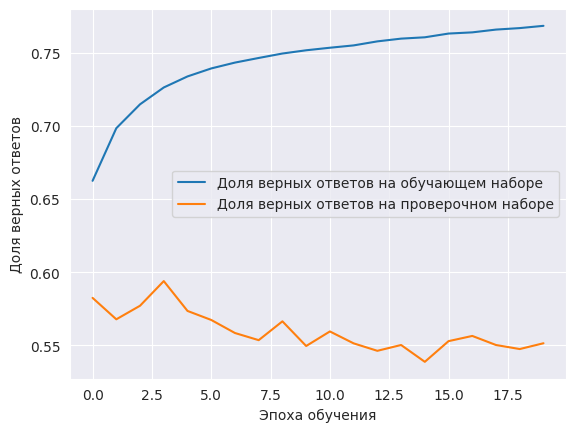

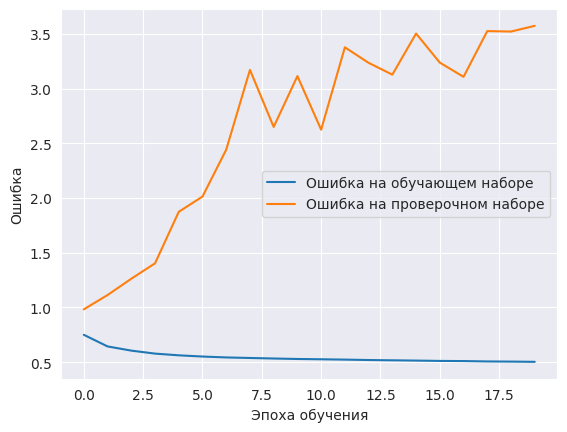

In [ ]:
FitModel(model4, 20, 1024)

In [ ]:
model4.save('/content/gdrive/MyDrive/scorring/Base/model4_db_bal_new.keras')

In [ ]:
loss, acc = model4.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 18s 2ms/step - loss: 1.2566 - accuracy: 0.6670


In [ ]:
acc

0.6669760346412659

8587/8587 [==============================] - 16s 2ms/step
[[ 3804     1   596     6]
 [    0 55688 18972 18061]
 [  295 18943 62615  4411]
 [    0 23120  7100 61158]]


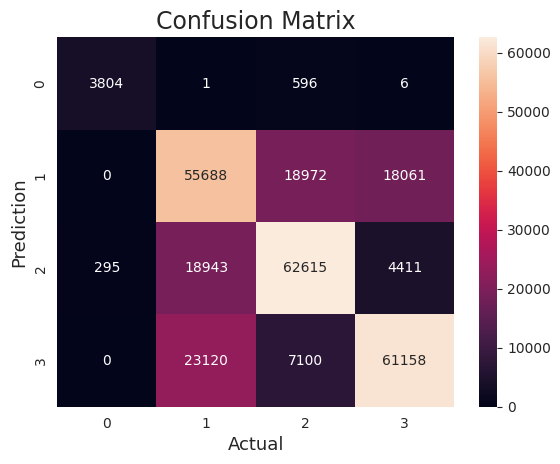

Accuracy   : 0.6669760163045456


In [ ]:
Prediction(model4)

## Модель 5

In [ ]:
number_of_cols = x.shape[1]

model5 = Sequential() # Последовательная модель нейронной сети

model5.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(4, activation='softmax'))

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               17920     
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)              

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
3347/3347 [==============================] - 88s 24ms/step - loss: 0.5917 - accuracy: 0.7230 - val_loss: 1.7175 - val_accuracy: 0.5581
Epoch 2/20
3347/3347 [==============================] - 79s 24ms/step - loss: 0.5368 - accuracy: 0.7523 - val_loss: 2.7045 - val_accuracy: 0.5555
Epoch 3/20
3347/3347 [==============================] - 77s 23ms/step - loss: 0.5096 - accuracy: 0.7693 - val_loss: 4.0777 - val_accuracy: 0.4906
Epoch 4/20
3347/3347 [==============================] - 74s 22ms/step - loss: 0.4889 - accuracy: 0.7809 - val_loss: 3.3040 - val_accuracy: 0.5551
Epoch 5/20
3347/3347 [==============================] - 75s 22ms/step - loss: 0.4708 - accuracy: 0.7918 - val_loss: 2.7077 - val_accuracy: 0.5083
Epoch 6/20
3347/3347 [==============================] - 98s 29ms/step - loss: 0.4514 - accuracy: 0.8024 - val_loss: 4.2506 - val_accuracy: 0.5312
Epoch 7/20
3347/3347 [==============================] - 81s 24ms/step - loss: 0.4388 - accuracy: 0.8092 - val_loss: 5.6447 -

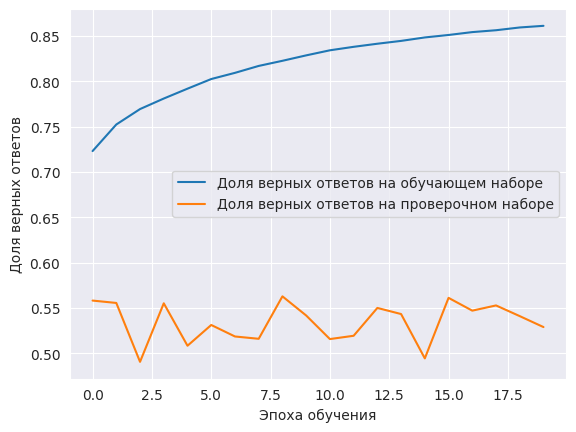

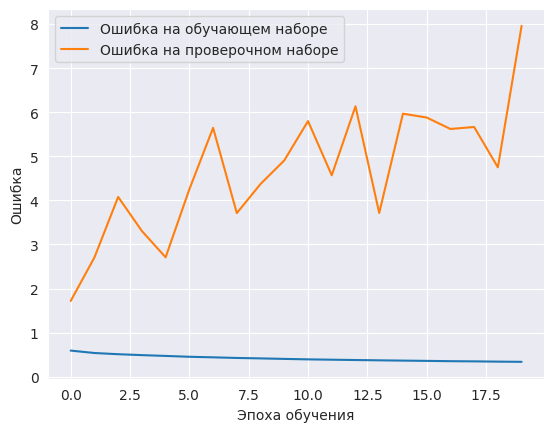

In [ ]:
FitModel(model5, 20, 256)

In [ ]:
model5.save('/content/gdrive/MyDrive/scorring/Base/mode5_db_bal_new.keras')

In [ ]:
loss, acc = model5.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 28s 3ms/step - loss: 2.1103 - accuracy: 0.6657


In [ ]:
acc

0.6656694412231445

8587/8587 [==============================] - 25s 3ms/step
[[ 3259     3  1142     3]
 [    1 67176 12719 12825]
 [   36 22784 56890  6554]
 [    1 30718  5078 55581]]


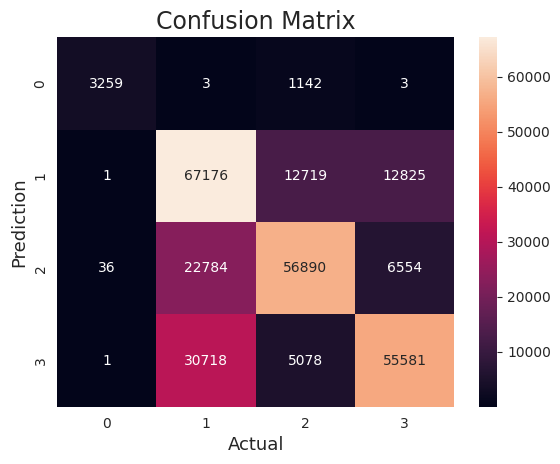

Accuracy   : 0.6656694690104451


In [ ]:
Prediction(model5)

## Модель 6

In [ ]:
number_of_cols = x.shape[1]

model6 = Sequential() # Последовательная модель нейронной сети

model6.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model6.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(4, activation='softmax'))

model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 151,300
Trainable params: 150,788
Non-trainable params: 512
________________________________________________

In [ ]:
model6.compile(optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
13387/13387 [==============================] - 110s 8ms/step - loss: 0.8676 - accuracy: 0.6352 - val_loss: 1.0200 - val_accuracy: 0.5495
Epoch 2/20
13387/13387 [==============================] - 105s 8ms/step - loss: 0.7269 - accuracy: 0.6724 - val_loss: 0.9699 - val_accuracy: 0.5813
Epoch 3/20
13387/13387 [==============================] - 107s 8ms/step - loss: 0.6904 - accuracy: 0.6843 - val_loss: 1.0278 - val_accuracy: 0.5703
Epoch 4/20
13387/13387 [==============================] - 102s 8ms/step - loss: 0.6686 - accuracy: 0.6929 - val_loss: 1.0092 - val_accuracy: 0.5788
Epoch 5/20
13387/13387 [==============================] - 103s 8ms/step - loss: 0.6531 - accuracy: 0.6987 - val_loss: 1.0146 - val_accuracy: 0.5796
Epoch 6/20
13387/13387 [==============================] - 104s 8ms/step - loss: 0.6404 - accuracy: 0.7039 - val_loss: 1.1707 - val_accuracy: 0.5567
Epoch 7/20
13387/13387 [==============================] - 108s 8ms/step - loss: 0.6295 - accuracy: 0.7097 - val_

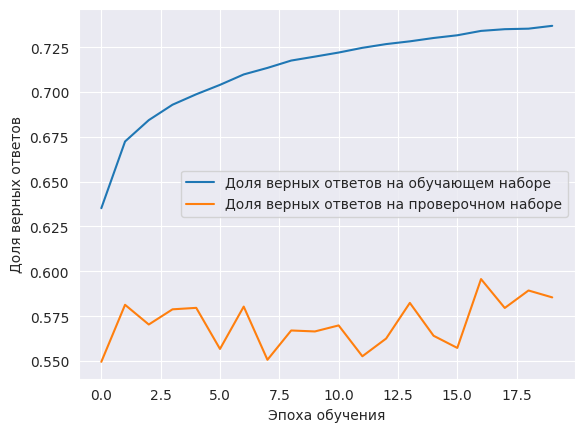

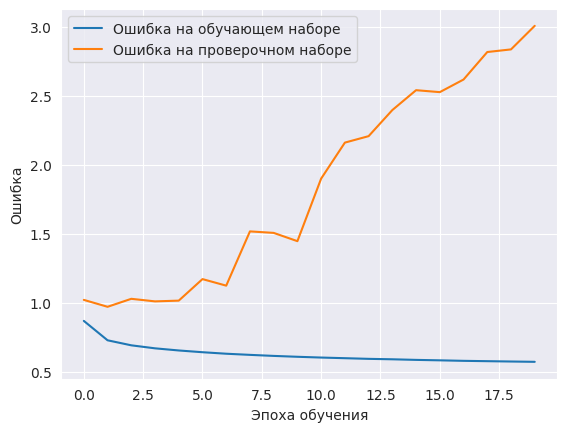

In [ ]:
FitModel(model6, 20, 64)

In [ ]:
model6.save('/content/gdrive/MyDrive/scorring/Base/mode6_db_bal_new.keras')

In [ ]:
loss, acc = model6.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 43s 5ms/step - loss: 1.4400 - accuracy: 0.6529


In [ ]:
acc

0.6528550982475281

8587/8587 [==============================] - 21s 2ms/step
[[ 3216    64  1114    13]
 [    5 44742 21572 26402]
 [  115 11922 64047 10180]
 [    0 15772  8226 67380]]


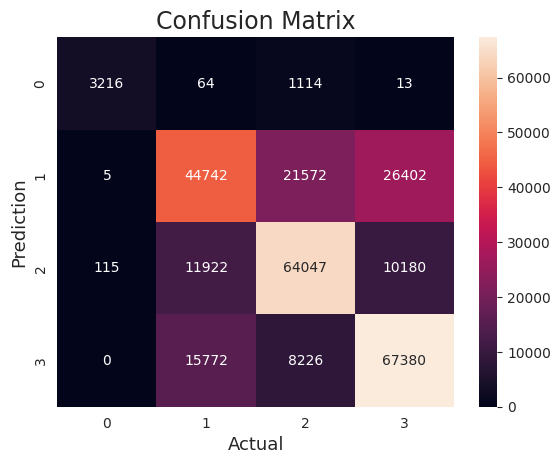

Accuracy   : 0.6528551151872475


In [ ]:
Prediction(model6)

## Модель 7

In [ ]:
number_of_cols = x.shape[1]

model7 = Sequential() # Последовательная модель нейронной сети

model7.add(Dense(512, input_dim=number_of_cols, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
model7.add(Dense(4, activation='softmax'))

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 151,300
Trainable params: 150,788
Non-trainable params: 512
________________________________________________

In [ ]:
model7.compile(optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
3347/3347 [==============================] - 55s 15ms/step - loss: 0.9278 - accuracy: 0.6227 - val_loss: 1.1122 - val_accuracy: 0.5121
Epoch 2/20
3347/3347 [==============================] - 49s 15ms/step - loss: 0.7542 - accuracy: 0.6755 - val_loss: 0.9777 - val_accuracy: 0.5453
Epoch 3/20
3347/3347 [==============================] - 55s 16ms/step - loss: 0.6986 - accuracy: 0.6899 - val_loss: 0.9659 - val_accuracy: 0.5394
Epoch 4/20
3347/3347 [==============================] - 49s 15ms/step - loss: 0.6639 - accuracy: 0.7000 - val_loss: 0.9718 - val_accuracy: 0.5498
Epoch 5/20
3347/3347 [==============================] - 51s 15ms/step - loss: 0.6425 - accuracy: 0.7072 - val_loss: 1.0011 - val_accuracy: 0.5387
Epoch 6/20
3347/3347 [==============================] - 50s 15ms/step - loss: 0.6271 - accuracy: 0.7144 - val_loss: 1.0187 - val_accuracy: 0.5447
Epoch 7/20
3347/3347 [==============================] - 54s 16ms/step - loss: 0.6144 - accuracy: 0.7198 - val_loss: 1.0626 -

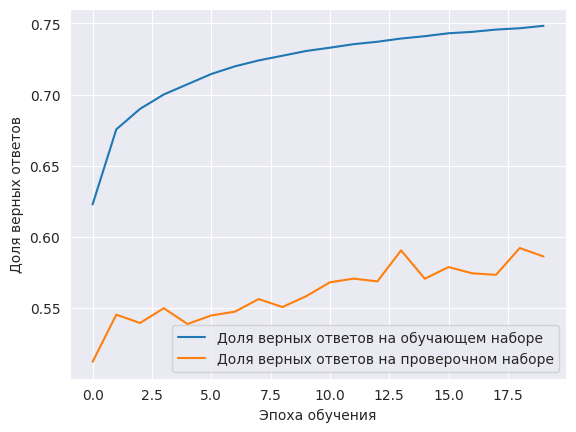

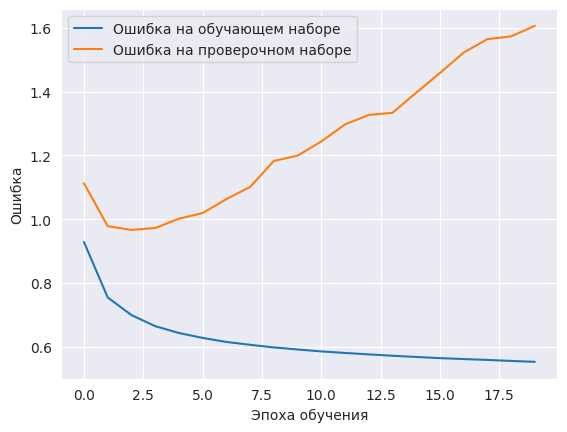

In [ ]:
FitModel(model7, 20, 256)

In [ ]:
model7.save('/content/gdrive/MyDrive/scorring/Base/mode7_db_bal_new.keras')

In [ ]:
loss, acc = model7.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 26s 3ms/step - loss: 0.8049 - accuracy: 0.6551


In [ ]:
acc

0.6551479697227478

8587/8587 [==============================] - 42s 5ms/step
[[ 3137    26  1212    32]
 [   16 53894 21931 16880]
 [  219 20044 62935  3066]
 [   27 23639  7663 60049]]


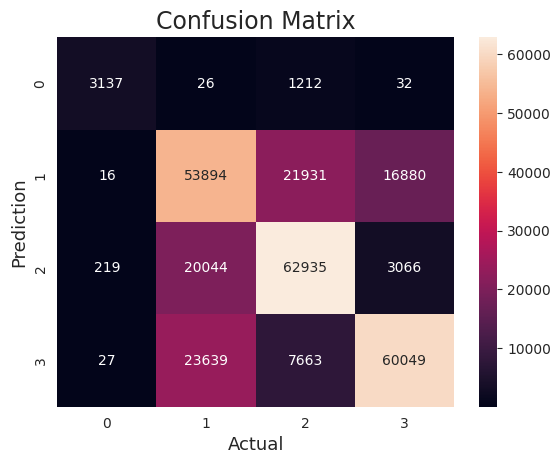

Accuracy   : 0.6551479419150562


In [ ]:
Prediction(model7)

## Модель 8

In [ ]:
number_of_cols = x.shape[1]

model8 = Sequential() # Последовательная модель нейронной сети

model8.add(Dense(560, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model8.add(Dense(280, kernel_initializer='lecun_normal', activation='selu'))
# model8.add(BatchNormalization())
# model8.add(Dropout(0.2))
model8.add(Dense(140, kernel_initializer='lecun_normal', activation='selu'))
# model8.add(BatchNormalization())
# model8.add(Dropout(0.2))
model8.add(Dense(4, activation='softmax'))

model8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 560)               19600     
                                                                 
 dense_43 (Dense)            (None, 280)               157080    
                                                                 
 dense_44 (Dense)            (None, 140)               39340     
                                                                 
 dense_45 (Dense)            (None, 4)                 564       
                                                                 
Total params: 216,584
Trainable params: 216,584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.compile(optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
3347/3347 [==============================] - 66s 19ms/step - loss: 0.7485 - accuracy: 0.6540 - val_loss: 0.9303 - val_accuracy: 0.5419
Epoch 2/20
3347/3347 [==============================] - 60s 18ms/step - loss: 0.6806 - accuracy: 0.6825 - val_loss: 0.8092 - val_accuracy: 0.5899
Epoch 3/20
3347/3347 [==============================] - 59s 18ms/step - loss: 0.6529 - accuracy: 0.6950 - val_loss: 0.7804 - val_accuracy: 0.6157
Epoch 4/20
3347/3347 [==============================] - 58s 17ms/step - loss: 0.6347 - accuracy: 0.7041 - val_loss: 0.7960 - val_accuracy: 0.6173
Epoch 5/20
3347/3347 [==============================] - 60s 18ms/step - loss: 0.6221 - accuracy: 0.7107 - val_loss: 0.8048 - val_accuracy: 0.6136
Epoch 6/20
3347/3347 [==============================] - 63s 19ms/step - loss: 0.6121 - accuracy: 0.7163 - val_loss: 0.7627 - val_accuracy: 0.6444
Epoch 7/20
3347/3347 [==============================] - 60s 18ms/step - loss: 0.6032 - accuracy: 0.7213 - val_loss: 0.8381 -

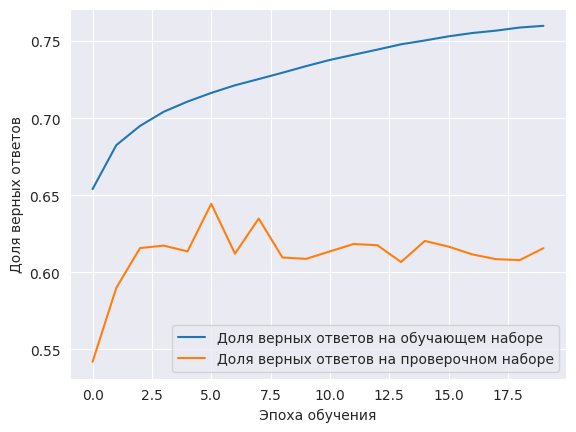

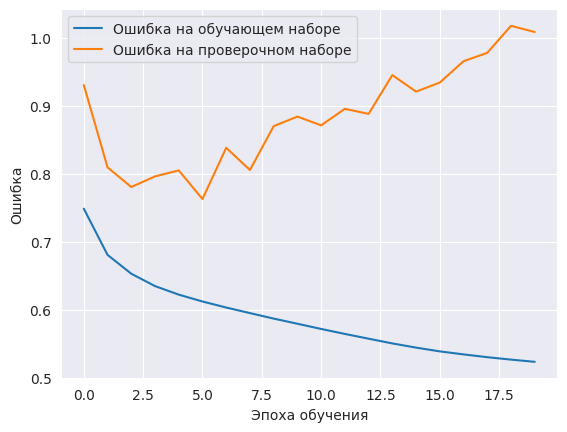

In [ ]:
FitModel(model8, 20, 256)

In [ ]:
model8.save('/content/gdrive/MyDrive/scorring/Base/mode8_db_bal_new.keras')

In [ ]:
loss, acc = model8.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 38s 4ms/step - loss: 0.7094 - accuracy: 0.6699


In [ ]:
acc

0.6699312329292297

8587/8587 [==============================] - 32s 4ms/step
[[ 3791    12   600     4]
 [   14 61268 17169 14270]
 [  387 24783 58524  2570]
 [   10 24599  6275 60494]]


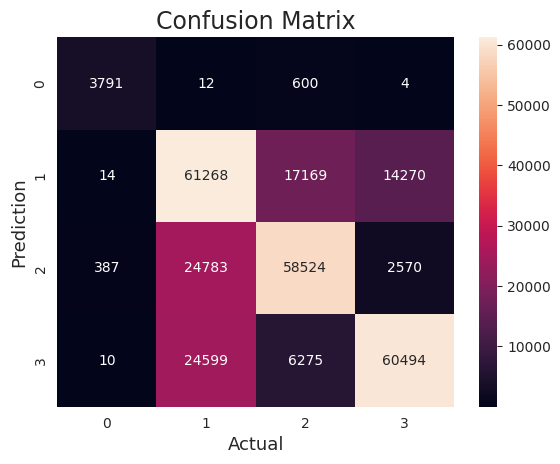

Accuracy   : 0.6699312151981658


In [ ]:
Prediction(model8)

## Модель 9

In [ ]:
number_of_cols = x.shape[1]

model9 = Sequential() # Последовательная модель нейронной сети

model9.add(Dense(560, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model9.add(Dense(280, kernel_initializer='lecun_normal', activation='selu'))
model9.add(BatchNormalization())
# model9.add(Dropout(0.2))
# model9.add(Dense(140, kernel_initializer='lecun_normal', activation='selu'))
# model9.add(BatchNormalization())
# model9.add(Dropout(0.2))
model9.add(Dense(4, activation='softmax'))

model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 560)               19600     
                                                                 
 dense_4 (Dense)             (None, 280)               157080    
                                                                 
 batch_normalization_1 (Batc  (None, 280)              1120      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 4)                 1124      
                                                                 
Total params: 178,924
Trainable params: 178,364
Non-trainable params: 560
_________________________________________________________________


In [ ]:
model9.compile(optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
837/837 [==============================] - 40s 46ms/step - loss: 0.9945 - accuracy: 0.6004 - val_loss: 1.1723 - val_accuracy: 0.5017
Epoch 2/20
837/837 [==============================] - 41s 49ms/step - loss: 0.8299 - accuracy: 0.6589 - val_loss: 1.0840 - val_accuracy: 0.5035
Epoch 3/20
837/837 [==============================] - 36s 43ms/step - loss: 0.7726 - accuracy: 0.6762 - val_loss: 0.9973 - val_accuracy: 0.5357
Epoch 4/20
837/837 [==============================] - 38s 46ms/step - loss: 0.7344 - accuracy: 0.6866 - val_loss: 0.9275 - val_accuracy: 0.5612
Epoch 5/20
837/837 [==============================] - 36s 43ms/step - loss: 0.7081 - accuracy: 0.6931 - val_loss: 0.9905 - val_accuracy: 0.5494
Epoch 6/20
837/837 [==============================] - 38s 45ms/step - loss: 0.6886 - accuracy: 0.6981 - val_loss: 0.9527 - val_accuracy: 0.5625
Epoch 7/20
837/837 [==============================] - 36s 43ms/step - loss: 0.6736 - accuracy: 0.7024 - val_loss: 0.9078 - val_accuracy:

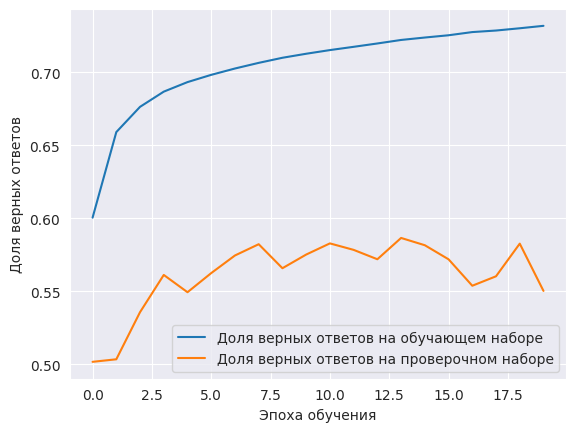

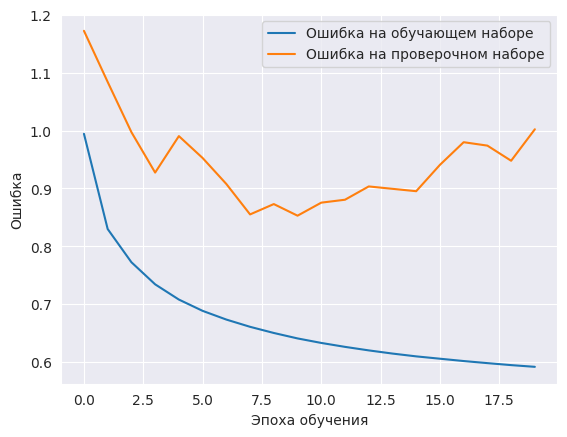

In [ ]:
FitModel(model9, 20, 1024)

In [ ]:
model9.save('/content/gdrive/MyDrive/scorring/Base/mode9_db_bal_new.keras')

NameError: ignored

In [ ]:
loss, acc = model9.evaluate(x_test, y_test, verbose=1) #classification

In [ ]:
acc

In [ ]:
Prediction(model9)

## Модель 10

In [ ]:
number_of_cols = x.shape[1]

model10 = Sequential() # Последовательная модель нейронной сети

model10.add(Dense(280, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model10.add(Dense(280, kernel_initializer='lecun_normal', activation='selu'))
model10.add(BatchNormalization())
# model10.add(Dropout(0.2))
# model10.add(Dense(140, kernel_initializer='lecun_normal', activation='selu'))
# model10.add(BatchNormalization())
# model10.add(Dropout(0.2))
model10.add(Dense(4, activation='softmax'))

model10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 280)               9800      
                                                                 
 dense_5 (Dense)             (None, 280)               78680     
                                                                 
 batch_normalization (BatchN  (None, 280)              1120      
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 4)                 1124      
                                                                 
Total params: 90,724
Trainable params: 90,164
Non-trainable params: 560
_________________________________________________________________


In [ ]:
model10.compile(optimizer=Adam(learning_rate=0.000001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
1674/1674 [==============================] - 35s 20ms/step - loss: 1.4014 - accuracy: 0.4472 - val_loss: 1.3748 - val_accuracy: 0.4342
Epoch 2/20
1674/1674 [==============================] - 33s 20ms/step - loss: 1.0803 - accuracy: 0.5850 - val_loss: 1.2024 - val_accuracy: 0.4782
Epoch 3/20
1674/1674 [==============================] - 30s 18ms/step - loss: 0.9762 - accuracy: 0.6160 - val_loss: 1.1572 - val_accuracy: 0.4850
Epoch 4/20
1674/1674 [==============================] - 32s 19ms/step - loss: 0.9320 - accuracy: 0.6248 - val_loss: 1.1720 - val_accuracy: 0.4835
Epoch 5/20
1674/1674 [==============================] - 31s 18ms/step - loss: 0.9066 - accuracy: 0.6304 - val_loss: 1.1468 - val_accuracy: 0.4960
Epoch 6/20
1674/1674 [==============================] - 30s 18ms/step - loss: 0.8887 - accuracy: 0.6349 - val_loss: 1.1628 - val_accuracy: 0.4873
Epoch 7/20
1674/1674 [==============================] - 30s 18ms/step - loss: 0.8738 - accuracy: 0.6396 - val_loss: 1.1656 -

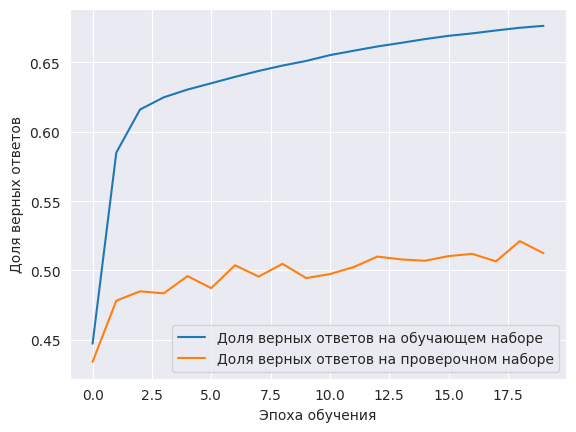

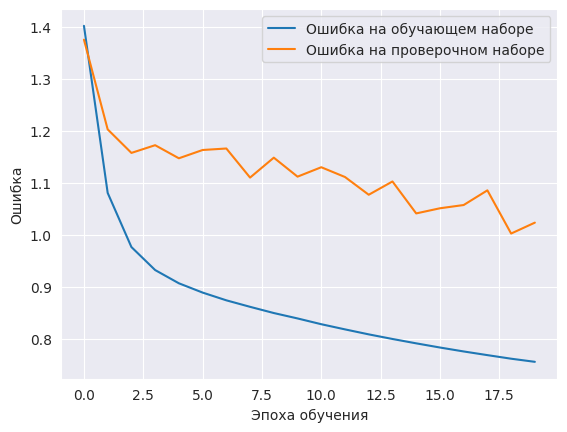

In [ ]:
FitModel(model10, 20, 512)

In [ ]:
model10.save('/content/gdrive/MyDrive/scorring/Base/model10_db_bal_new.keras')

In [ ]:
loss, acc = model10.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 23s 3ms/step - loss: 0.8246 - accuracy: 0.6222


In [ ]:
acc

0.6222476959228516

8587/8587 [==============================] - 20s 2ms/step
[[ 2023     8  2375     1]
 [  217 36696 23181 32627]
 [  225 17215 62437  6387]
 [  153 13024  8382 69819]]


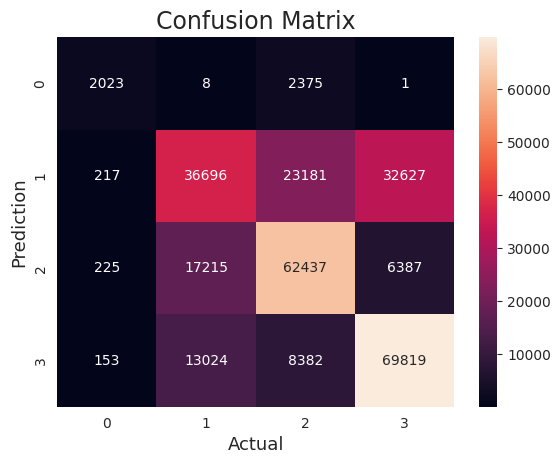

Accuracy   : 0.6222476980747534


In [ ]:
Prediction(model10)

## Модель 11

In [ ]:
number_of_cols = x.shape[1]

model11 = Sequential() # Последовательная модель нейронной сети

model11.add(Dense(420, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model11.add(Dense(210,kernel_initializer='lecun_normal', activation='selu'))
model11.add(BatchNormalization())
# model11.add(Dropout(0.2))
# model11.add(Dense(140, kernel_initializer='lecun_normal', activation='selu'))
# model11.add(BatchNormalization())
# model11.add(Dropout(0.2))
model11.add(Dense(4, activation='softmax'))

model11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 420)               14700     
                                                                 
 dense_14 (Dense)            (None, 210)               88410     
                                                                 
 batch_normalization_3 (Batc  (None, 210)              840       
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 4)                 844       
                                                                 
Total params: 104,794
Trainable params: 104,374
Non-trainable params: 420
_________________________________________________________________


In [ ]:
model11.compile(optimizer=Adam(learning_rate=0.000001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
1674/1674 [==============================] - 36s 21ms/step - loss: 1.4049 - accuracy: 0.4006 - val_loss: 1.2534 - val_accuracy: 0.4565
Epoch 2/20
1674/1674 [==============================] - 35s 21ms/step - loss: 1.0472 - accuracy: 0.5860 - val_loss: 1.1859 - val_accuracy: 0.4796
Epoch 3/20
1674/1674 [==============================] - 35s 21ms/step - loss: 0.9548 - accuracy: 0.6151 - val_loss: 1.2471 - val_accuracy: 0.4607
Epoch 4/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.9167 - accuracy: 0.6241 - val_loss: 1.2112 - val_accuracy: 0.4803
Epoch 5/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.8951 - accuracy: 0.6304 - val_loss: 1.2254 - val_accuracy: 0.4793
Epoch 6/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.8782 - accuracy: 0.6353 - val_loss: 1.1833 - val_accuracy: 0.4860
Epoch 7/20
1674/1674 [==============================] - 35s 21ms/step - loss: 0.8633 - accuracy: 0.6407 - val_loss: 1.1456 -

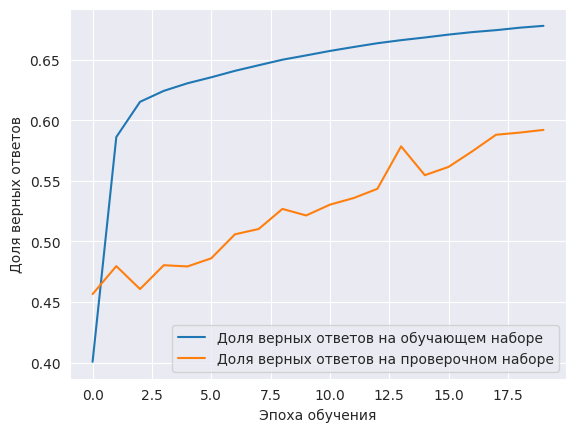

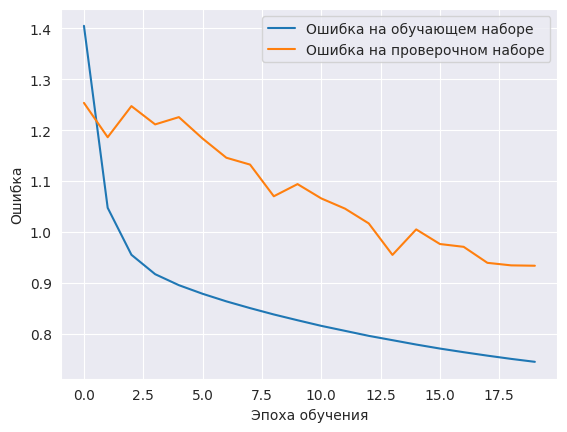

In [ ]:
FitModel(model11, 20, 512)

In [ ]:
model11.save('/content/gdrive/MyDrive/scorring/Base/model11_db_bal_new.keras')

In [ ]:
loss, acc = model11.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 24s 3ms/step - loss: 0.8242 - accuracy: 0.6262


In [ ]:
acc

0.6262146234512329

8587/8587 [==============================] - 20s 2ms/step
[[ 2187     2  2211     7]
 [   44 46841 20144 25692]
 [  100 19878 61077  5209]
 [   40 16774  7118 67446]]


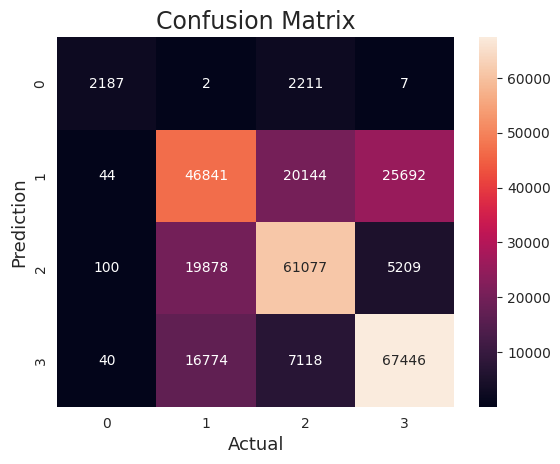

Accuracy   : 0.6461804418240711


In [ ]:
Prediction(model11)

##Модель 11.1

In [ ]:
model11_1 = model11

Epoch 1/20
1674/1674 [==============================] - 35s 21ms/step - loss: 0.7391 - accuracy: 0.6789 - val_loss: 0.8943 - val_accuracy: 0.6101
Epoch 2/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.7341 - accuracy: 0.6805 - val_loss: 0.9080 - val_accuracy: 0.6007
Epoch 3/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.7292 - accuracy: 0.6818 - val_loss: 0.8855 - val_accuracy: 0.6076
Epoch 4/20
1674/1674 [==============================] - 33s 19ms/step - loss: 0.7250 - accuracy: 0.6831 - val_loss: 0.8784 - val_accuracy: 0.6176
Epoch 5/20
1674/1674 [==============================] - 32s 19ms/step - loss: 0.7207 - accuracy: 0.6839 - val_loss: 0.8680 - val_accuracy: 0.6179
Epoch 6/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.7168 - accuracy: 0.6851 - val_loss: 0.8470 - val_accuracy: 0.6232
Epoch 7/20
1674/1674 [==============================] - 33s 20ms/step - loss: 0.7130 - accuracy: 0.6863 - val_loss: 0.8567 -

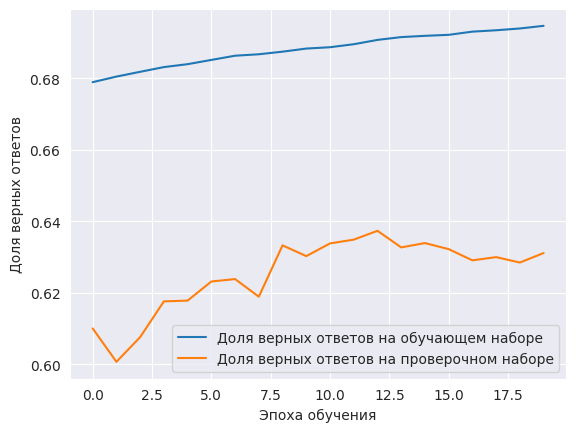

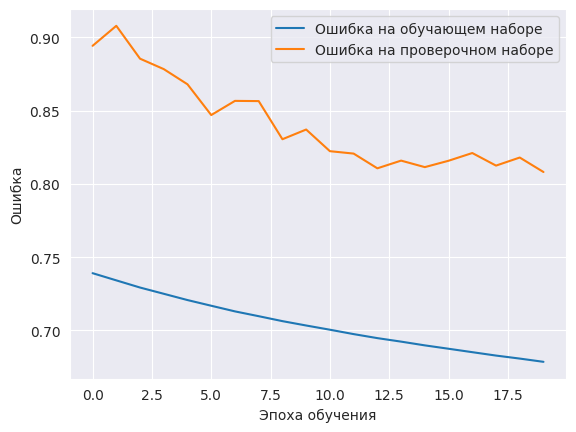

In [ ]:
FitModel(model11_1, 20, 512)

In [ ]:
model11_1.save('/content/gdrive/MyDrive/scorring/Base/model11_1_db_bal_new.keras')

In [ ]:
loss, acc = model11_1.evaluate(x_test, y_test, verbose=1) #classification

8587/8587 [==============================] - 23s 3ms/step - loss: 0.7475 - accuracy: 0.6462


In [ ]:
acc

0.6461804509162903

8587/8587 [==============================] - 22s 3ms/step
[[ 2187     2  2211     7]
 [   44 46841 20144 25692]
 [  100 19878 61077  5209]
 [   40 16774  7118 67446]]


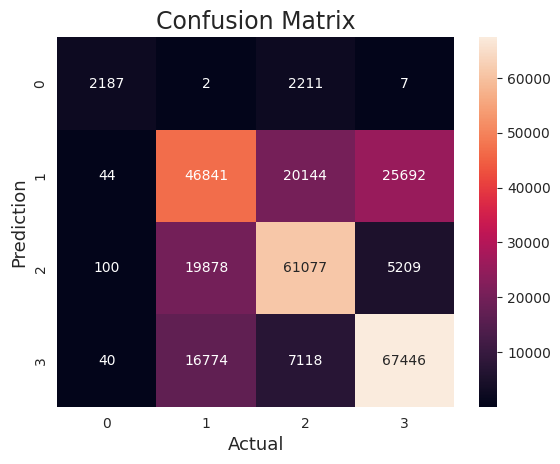

Accuracy   : 0.6461804418240711


In [ ]:
Prediction(model11_1)

##Тест без id_nbki

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87315 entries, 0 to 87314
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          87315 non-null  int8   
 1   city_name                            87315 non-null  int16  
 2   population                           87315 non-null  float64
 3   date of birth                        87315 non-null  int16  
 4   gender                               87315 non-null  int8   
 5   education                            87315 non-null  int8   
 6   position                             87315 non-null  int8   
 7   dt_nbki                              87315 non-null  int16  
 8   id_nbki                              87315 non-null  int16  
 9   issued                               87315 non-null  int16  
 10  amount                               87315 non-null  float64
 11  type_credit                 

In [ ]:
X1 = X.drop(columns = 'id_nbki')

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87315 entries, 0 to 87314
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          87315 non-null  int8   
 1   city_name                            87315 non-null  int16  
 2   population                           87315 non-null  float64
 3   date of birth                        87315 non-null  int16  
 4   gender                               87315 non-null  int8   
 5   education                            87315 non-null  int8   
 6   position                             87315 non-null  int8   
 7   dt_nbki                              87315 non-null  int16  
 8   issued                               87315 non-null  int16  
 9   amount                               87315 non-null  float64
 10  type_credit                          87315 non-null  int8   
 11  status_credit               

Feature: date of birth Score: 1.3041760816519101
Feature: city_name Score: 0.5515053247673833
Feature: population Score: 0.5497316655783617
Feature: dt_nbki Score: 0.39611029323694424
Feature: type_debt Score: 0.2587135055855416
Feature: amount_principal_debt_repaid Score: 0.1506295910473261
Feature: last_payment Score: 0.1400519254130046
Feature: region_name Score: 0.1307855384112795
Feature: position Score: 0.1306951081545975
Feature: updated Score: 0.11770391928319413
Feature: date_credit_state Score: 0.1111140290130237
Feature: psk Score: 0.11031338544904212
Feature: balance Score: 0.10759546458925406
Feature: period Score: 0.09876526783980921
Feature: issued Score: 0.09866594350657643
Feature: education Score: 0.07398000549211847
Feature: amount Score: 0.06300619270423091
Feature: actual_payments_24_Months Score: 0.05740607727892222
Feature: current_indebtedness Score: 0.05638115714800307
Feature: maximum_amount_overdue_indebtedness Score: 0.054724168762001923
Feature: next_paymen

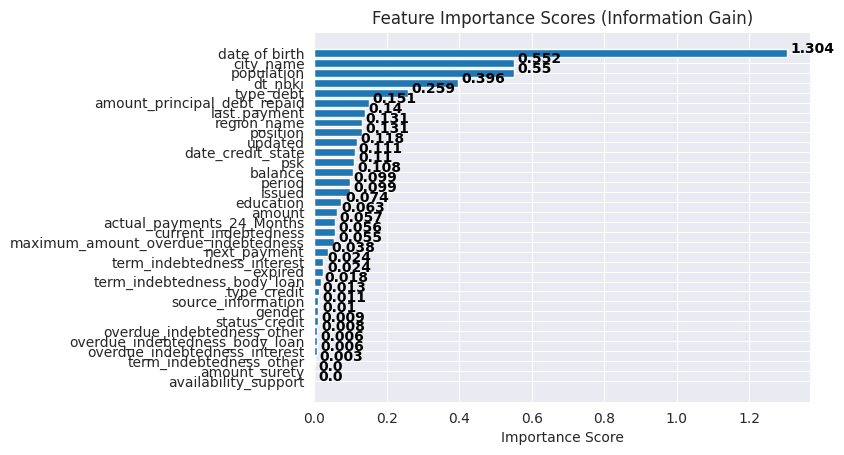

In [ ]:
# Apply Information Gain
ig = mutual_info_regression(X1, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X1.columns.values)):
    feature_scores[X1.columns.values[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

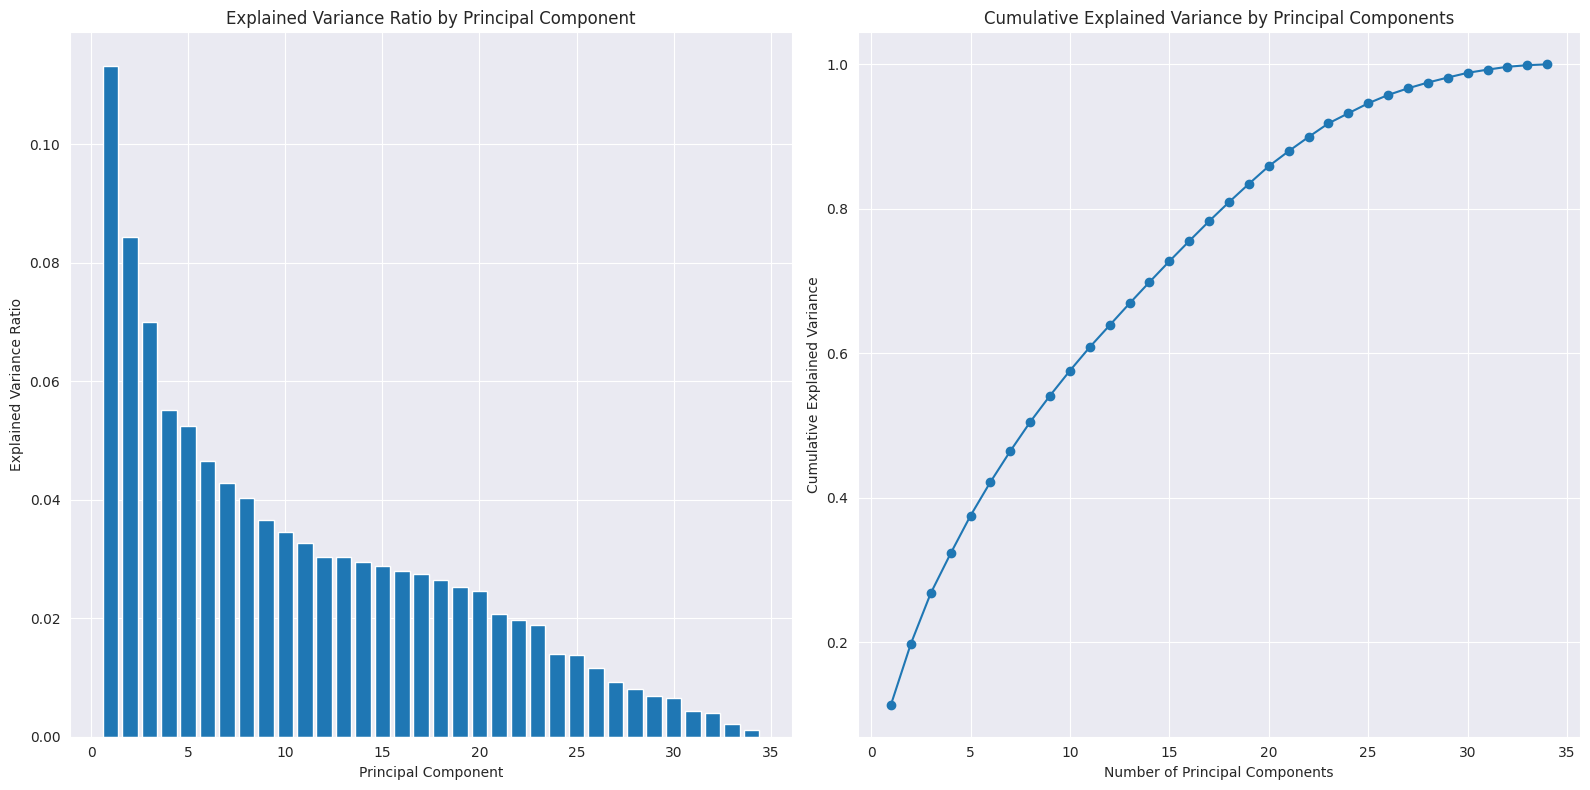

In [ ]:
# Standardize the features

X1_scaled = scaler.fit_transform(X1)

# Perform PCA
pca = PCA()
X1_pca = pca.fit_transform(X1_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

In [ ]:
#Как видно из графиков, основными являются первые 16 признаков, они охватывают более 80% общей дисперсии

In [ ]:
X1 = X.drop(columns = 'expired')
X1 = X.drop(columns = 'term_indebtedness_interest')
X1 = X.drop(columns = 'term_indebtedness_body_loan')
X1 = X.drop(columns = 'type_credit')
X1 = X.drop(columns = 'gender')
X1 = X.drop(columns = 'maximum_amount_overdue_indebtedness')
#X1 = X.drop(columns = 'availability_support')
X1 = X.drop(columns = 'overdue_indebtedness_body_loan')
X1 = X.drop(columns = 'overdue_indebtedness_interest')
X1 = X.drop(columns = 'overdue_indebtedness_other')
X1 = X.drop(columns = 'term_indebtedness_other')
X1 = X.drop(columns = 'amount_surety')

In [ ]:
X1 = X.drop(columns = 'overdue_indebtedness_body_loan')
X1 = X.drop(columns = 'overdue_indebtedness_interest')
X1 = X.drop(columns = 'overdue_indebtedness_other')
X1 = X.drop(columns = 'term_indebtedness_other')
X1 = X.drop(columns = 'amount_surety')

In [ ]:
X1.shape


(87315, 34)

In [ ]:
y = to_categorical(y, num_classes = 4)

print('Размер y:',y.shape)

Размер y: (87315, 4)


In [ ]:
# разбиваем на train и test
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)
print('Размер x1_train:',x1_train.shape)
print('Размер y1_train:',y1_train.shape)

Размер x1_train: (69852, 34)
Размер y1_train: (69852, 4)


In [ ]:
number_of_cols = x1_train.shape[1]

model123 = Sequential() # Последовательная модель нейронной сети

model123.add(Dense(512, input_dim=number_of_cols, activation='relu'))

model123.add(Dense(256, activation='relu'))
#model12.add(Dense(32, activation='relu'))
model123.add(Dense(4, activation='softmax'))

model123.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               17920     
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 150276 (587.02 KB)
Trainable params: 150276 (587.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model123.compile(optimizer=Adam(learning_rate=0.005),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/100
69/69 [==============================] - 3s 31ms/step - loss: 7294.4937 - accuracy: 0.2873 - val_loss: 1.6347 - val_accuracy: 0.2806
Epoch 2/100
69/69 [==============================] - 2s 25ms/step - loss: 1.5242 - accuracy: 0.2739 - val_loss: 1.4173 - val_accuracy: 0.2670
Epoch 3/100
69/69 [==============================] - 2s 26ms/step - loss: 1.5285 - accuracy: 0.2719 - val_loss: 1.4131 - val_accuracy: 0.2735
Epoch 4/100
69/69 [==============================] - 2s 29ms/step - loss: 1.4950 - accuracy: 0.2749 - val_loss: 1.4650 - val_accuracy: 0.2742
Epoch 5/100
69/69 [==============================] - 2s 26ms/step - loss: 1.4059 - accuracy: 0.2733 - val_loss: 1.3813 - val_accuracy: 0.2734
Epoch 6/100
69/69 [==============================] - 3s 41ms/step - loss: 1.3712 - accuracy: 0.2795 - val_loss: 1.3768 - val_accuracy: 0.2782
Epoch 7/100
69/69 [==============================] - 3s 44ms/step - loss: 1.3718 - accuracy: 0.2734 - val_loss: 1.3887 - val_accuracy: 0.2734
Epo

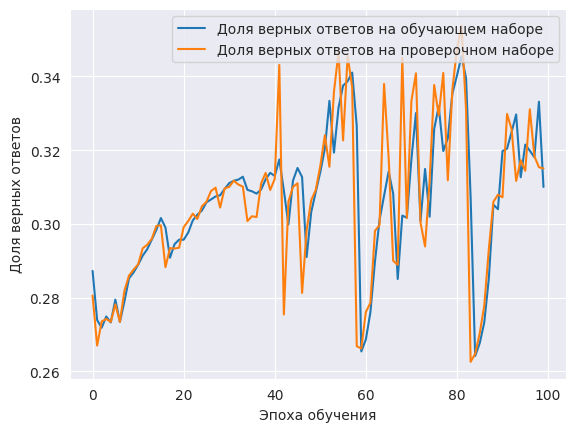

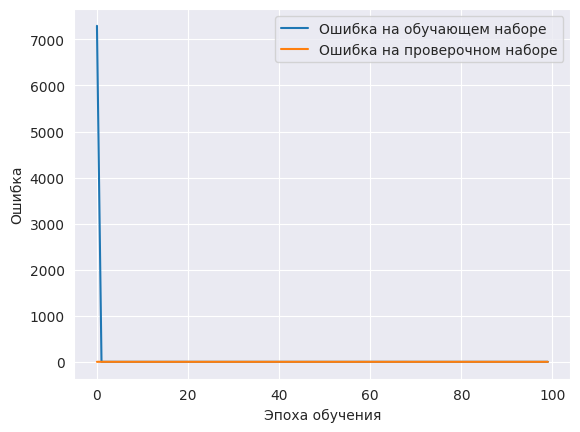

In [ ]:
import time
start_time = time.time() # счетчик времени
history_1 = model123.fit(x1_train,                            # Обучающая выборка
                        y1_train,                               # Метки классов обучающей выборки
                        epochs=100,                             # Количество эпох
                        batch_size=1024,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x1_test, y1_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history_1.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model123.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model123.keras')

In [ ]:
loss, acc = model123(x_test, y_test, verbose=0) #classification

y_predictions = model123(x_test)# оценка производительности модели

ValueError: ignored

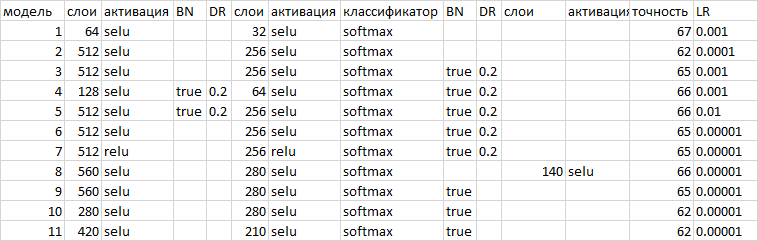

Вывод батчнорализация понижает точность, лучше всего модель работает на меньшем количесе нейронов